# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

# Step 0. Pre-project summary

- The stakeholders in this project is the Salifort Motors company. They are the ones who provide the dataset. 
 - They goal of this analysis would be to find reasons/indications for a high turnover rate in the company recently. To do this we will do EDA and build a model that will predict the likehood of leaving the company
- The dataset is used in this capstone project is publicly available on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)
 - From the ethical point of view, the project is goals and assumptions seems to be fine. The goal of the company is to apply preventive actions to the employees that are about to leave in order to keep the in the company

# Step 1. Imports

We will import the packages on the fly, as they are needed in each section.
For the initial part we need packages that handle tabular data and some visualisation tools.

In this section we will load the data using `pandas` and look up the first few rows of the data



### Import packages

In [1]:
#standard set of packages for tabular data manipulation
import numpy as np
import pandas as pd

#standard set of packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

# Step 2. Data Exploration (Initial EDA and data cleaning)


### Gather basic information about the data

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


We have 8 numeric and 2 non-numeric columns. Looks like there aren't any outliers here. Also the `object` columns are strings. By the look on the head of the data we notice some nominal and ordinal categorical columns. 

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include = 'all')


satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

Most of the numeric columns have their maximum values withi 2-3 stds away from the mean. Also the minimal values are seem normal. The only exception is the `time_spend_company`, where the maximum is further away from the mean.

In addition we have 10 values in  `departments` and 3 levels of `salary` 

### Rename columns

We will do now a simple column renaming to fix some inconsistencies and typos. We will unify the format to the `snake_case`

In [5]:
#listing all current column names
columns = list(df0.columns) 

#listing column names with our preffered names
columns_fixed = ['satisfaction_level',
 'last_evaluation',
 'number_of_projects',
 'average_monthly_hours',
 'years_in_company',
 'work_accidents',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

#Creating a dictionary with old and fixed names
col_dict = {columns[i]: columns_fixed[i] for i in range(len(columns))}

# Renaming columns as needed
df0 = df0.rename(columns = col_dict)

#new columns displayed for check
df0.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_in_company  work_accidents  left  \
0                    157                 3               0     1   
1                    262                 6               0     1   
2                    272                 4               0     1   
3                    223                 5               0     1   
4                    159                 3               0     1   

   promotion_last_5years department  salary  
0                      0      sales     low  
1                      0      sales  medium  
2                      0      sales  medium  
3                      0      sales     low  
4                      0      sales     low

### Check for missing values

In [6]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_in_company         0
work_accidents           0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check for duplicates

In [7]:
df0.duplicated().sum()

3008

In [8]:
# Inspecting some rows containing duplicates
df_dups = df0[df0.duplicated()]
df_dups.head()

satisfaction_level  last_evaluation  number_of_projects  \
396                 0.46             0.57                   2   
866                 0.41             0.46                   2   
1317                0.37             0.51                   2   
1368                0.41             0.52                   2   
1461                0.42             0.53                   2   

      average_monthly_hours  years_in_company  work_accidents  left  \
396                     139                 3               0     1   
866                     128                 3               0     1   
1317                    127                 3               0     1   
1368                    132                 3               0     1   
1461                    142                 3               0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

The are quite a lot of duplicates. In this dataset it's very unlikely that 2 employees have the same data in every of the 10 columns. We will remove duplicates now.

In [9]:
# Dropping duplicates and saving the resulting dataframe in a new variable 'df'
df = df0.drop_duplicates(keep = 'first').copy()

### Check outliers

We previously identified a column with potential outliers - `years_in_company`. Now we will give it a closer look

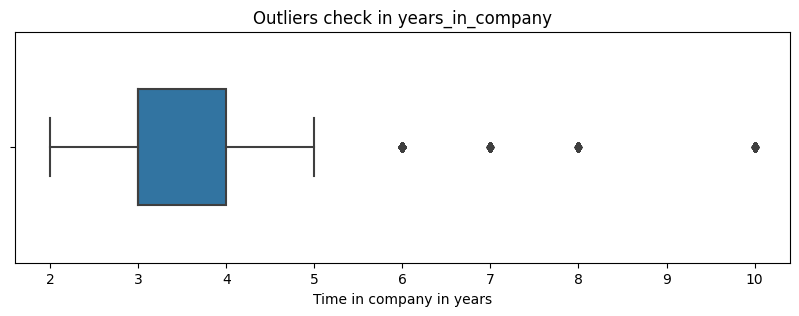

In [10]:
# Creating a boxplot to visualize distribution of `years_in_company` and detect any outliers
plt.figure(figsize = (10,3))
sns.boxplot(data = df , x = 'years_in_company' , width = 0.5)  #width parameter narrows down the box
plt.title('Outliers check in years_in_company')
plt.xlabel('Time in company in years')
plt.show()

There are some outliers in this column. To determine their number normally we would need to calculate the `1.5 IQR` distance - the end of the `upper limit whisker`. In this case we're lucky because the data is in the `int` format and the whisker value (the `mean + 1.5 IQR`) can be read from the plot. To determine the number of outliers we will simply take all the rows with the value starting from the first value above the upper whisker: `years_in_company >= 6`

In [11]:
#Filtering the rows containing outliers
df_outliers = df[df['years_in_company'] >= 6]
#Counting them
df_outliers.shape

(824, 10)

## Basic info overview

### Data types
We have 10 columns in the dataset. 8 are in numerical formats `int` and `float`, the 2 `object` columns are made of `string` type

| data type | columns | 
| --- | ---| 
| numerical | `satisfaction_level` , `last_evaluation`, `number_project`, `average_montly_hours`,`time_spend_company`|
| categorical nominal | `work_accident` , `left` , `promotion_last_5years`, `Department` |
| ordinal categorical | `salary`|

We identify `left` column as the **target variable** of the Machine learning model we are to build in this project

### Order and aethetics

We renamed the columns to normalize their format and fix a few typos

### Missing values

The dataset doesn't contain missing values

### Duplicates

The dataset contains 3008 duplicated rows. Since the duplication in this dataset is very unlikely we decided to remove the duplicated rows from the dataset, keeping just one (the first) instance of it.


### Outliers

The `std` values in all columns are smaller than the `mean` which indicates no obvious, gigantic outliers and data densly concentrated around the mean. The max values of most of the columns is within 2-3 `std` from the `mean`. 

In `time_spend_company` (changed to `years_in_company`) the maximum seems to be an outlier however. When plotting there ar eabt 800 outliers (outside of the box plot 1.5 IQR whiskers). However, the values are still realistic as these are almost certainly real values of loyal lont-term employees.

Certain types of models are more sensitive to outliers than others, so the removal in the further stage of the project will depend on the model of choice.
The Tree models are resistant to outliers so they seem to be a preffered choice of the model. 
The outliers in the `years_in_company` are about 5% of the total amount. The distribution has a skew that comes from the nature of the variable. 
We will leave them as they are for now, and use all the rows for the EDA.

## Step 2. Data Exploration (Continue EDA)

In this section we will analyze the data - try to understand its structure and relationships between the features. We will draw insights from data visualization and infer which features will be useful for the next step - building a machine learning model.

We will start our analysis from determining taking a closer look at our target variable - `left` 

In [12]:
# Getting numbers of people who left vs. stayed
print(df['left'].value_counts())
print()

#expressed in percent
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


About 16.5% of people left the company. The data is unbalanced but there are enough occurences of each class for a tree based model. 

It's hard to say if the rate is high or not, as we don't have any time data in the dataset and can't tell the timespan. The assumption of the project is that the rate is high(which is the reason to start this project), hence we assume that the data we have is recent. 

### satisfaction_level vs last_valuation

Among the data there are 2 features that are subjective:
- `satisfaction_level` Employee-reported job satisfaction level 
- `last_evaluation` Score of employee's last performance review 

Let's look at them together to see how well the satisfaction of the employees correlates with high performance

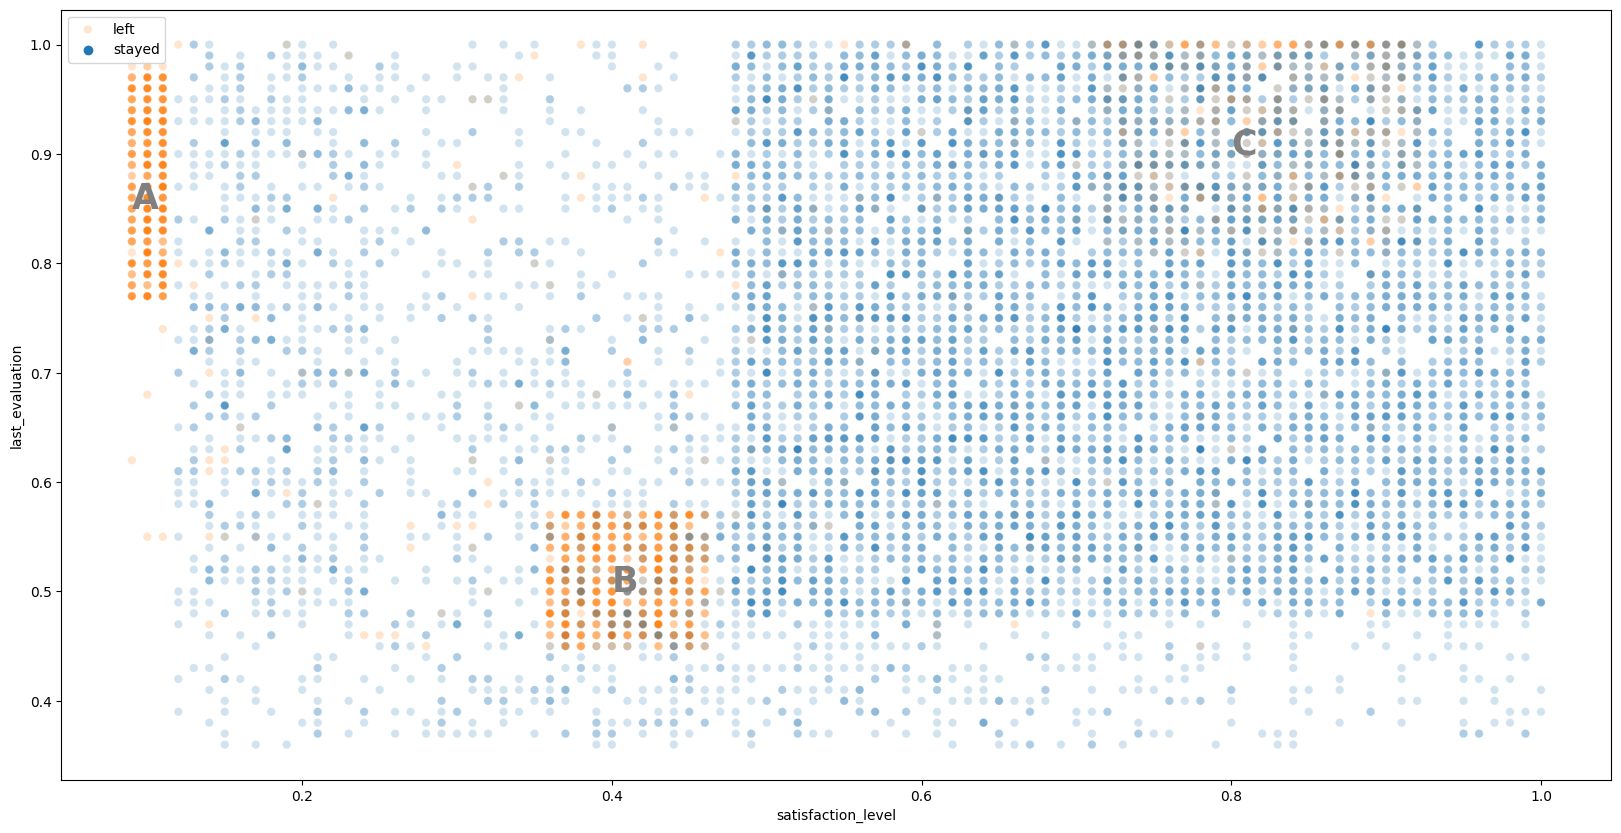

In [13]:
#plotting last evaluation vs satisfaction 
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data =df, x = 'satisfaction_level' , y = 'last_evaluation', hue = 'left', alpha = 0.2)  #alpha parameter allows to see the proportion of "stayed" and "left" in each point
plt.legend(labels = ['left', 'stayed'])

# 3 groups' marks
plt.text(0.09, 0.85, "A", horizontalalignment='left', fontsize=25, color='grey', weight='semibold')
plt.text(0.4, 0.5, "B", horizontalalignment='left', fontsize=25, color='grey', weight='semibold')
plt.text(0.8, 0.9, "C", horizontalalignment='left', fontsize=25, color='grey', weight='semibold')
plt.show()

First of all the graph doesn't look natural. The distribution looks artificial. This may be the case of data manipulation (eg. an imputation of missing values or simply) or simply a signal that the data is synthetic. Alternatively, there may be a bias in the surveys due to some in-company instructions/suggestions/indications since the corner high evaluation , high satisfaction is much more populated, with a failry homogenous distribution inside it. 

The graph reveals that people who left (marked as orange) form 3 distinct groups. 

Group A - People with high evaluation but very low satisfaction
Group B - People with below average evaluation and satisfaction
Group C - People with high evaluation and high satisfaction

Groups A and B are clear and with a strong tendency towards quitting. Group C is less inclined towards quitting but there is a higher tendency than in other regions.

We will now try to get more insight in the origin of those 3 groups.

To find other values that may be interesting and in which whe 3 aforementioned groups stand out, we will plot the same `last_evaluation vs. satifaction level` scatteplot, using the remaining features as the hue parameters. This operation will allow us to quickly spot the features in which the 3 groups identified above stand out.


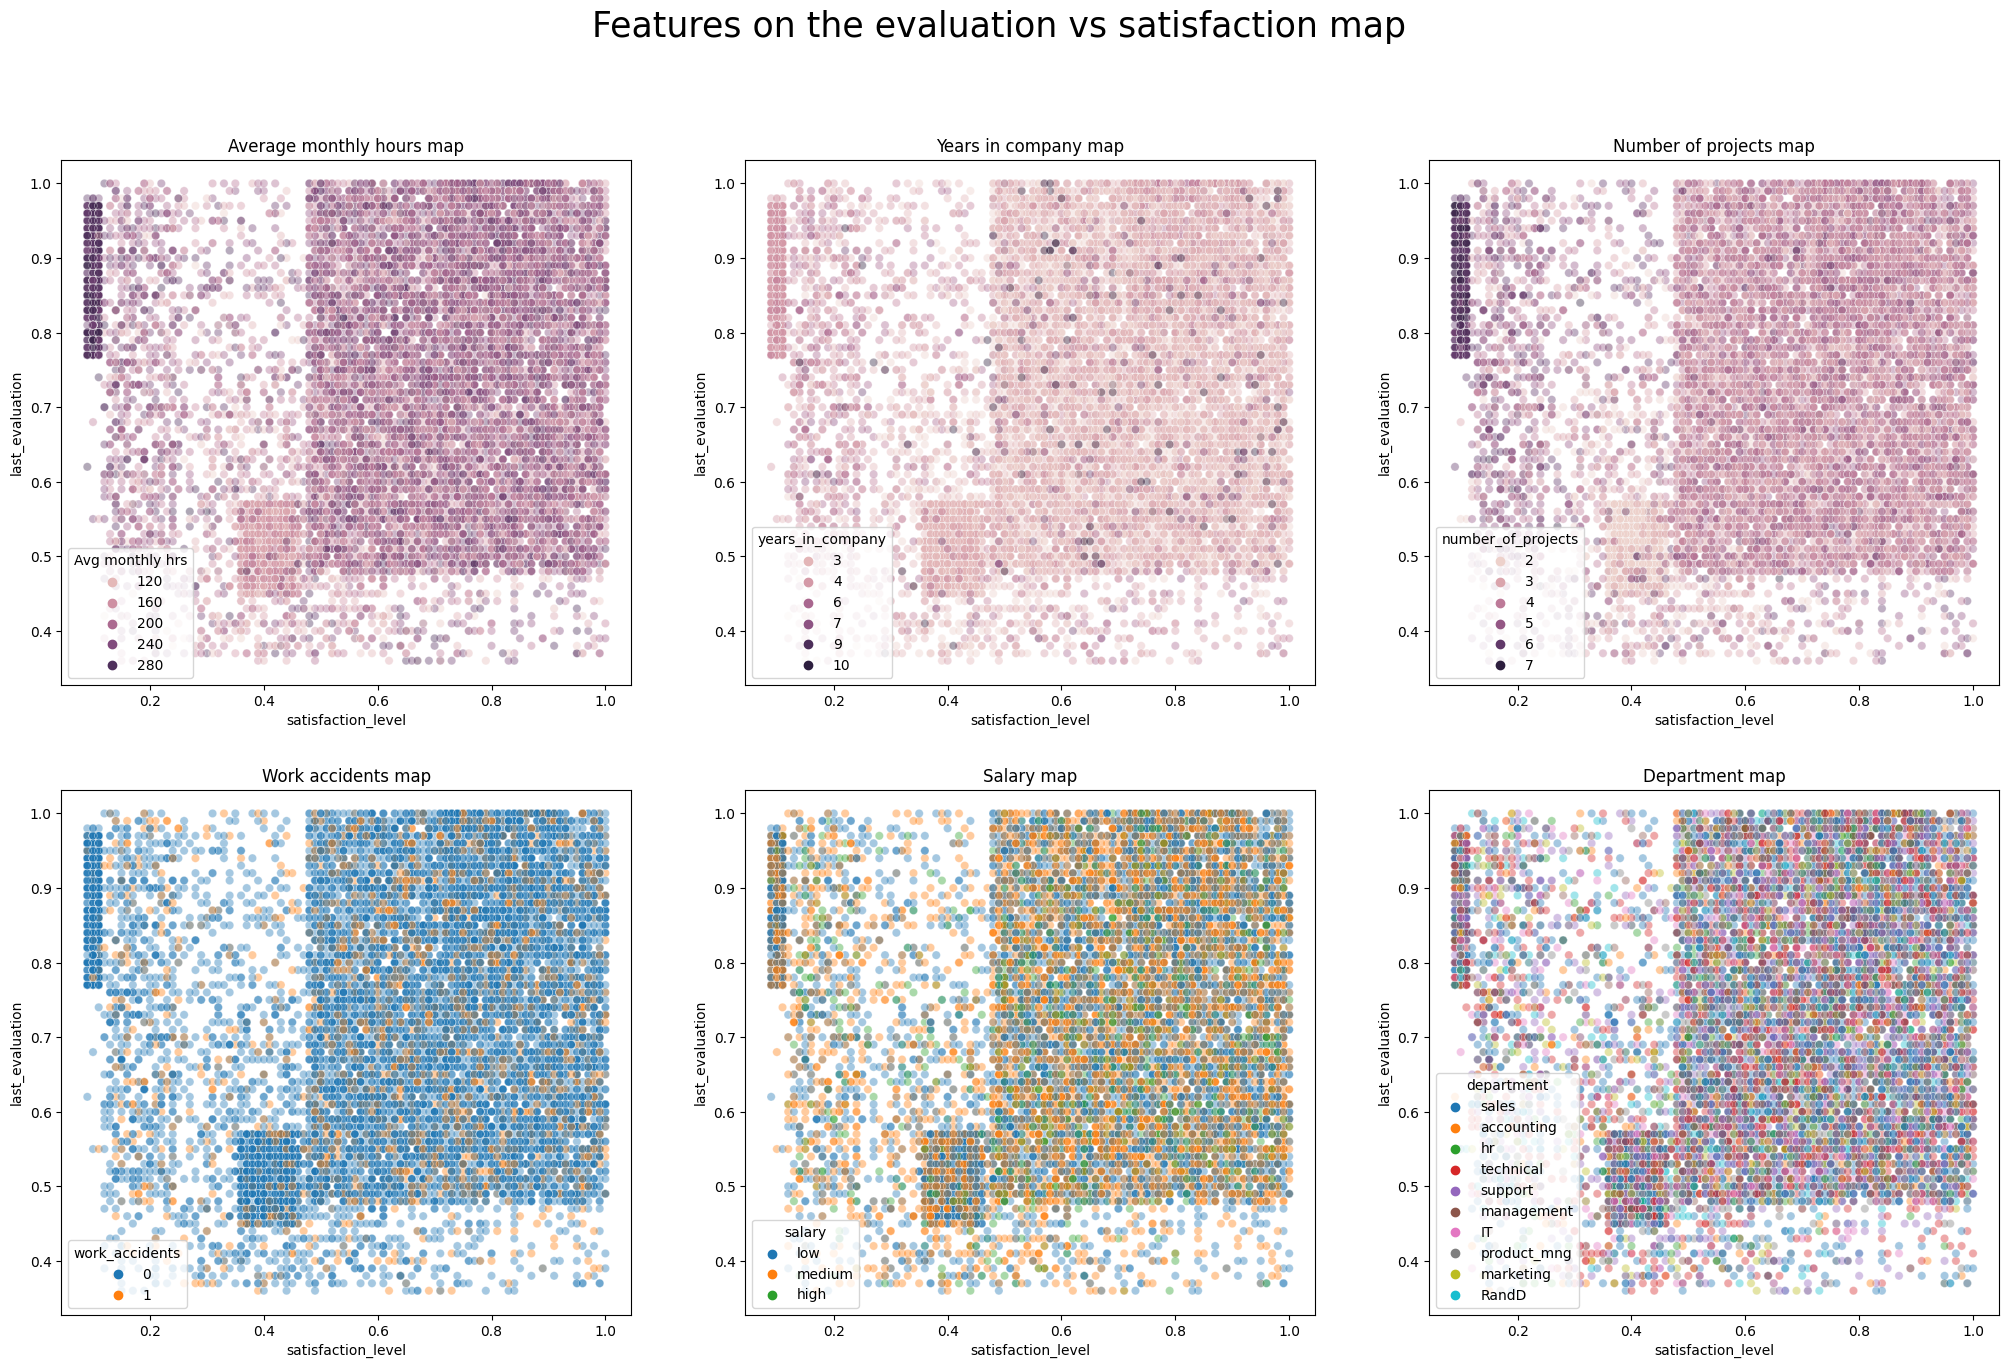

In [14]:
#plotting remaining features as the hue parameter of the last_evaluation vs satisfaction_level plot

fig ,ax = plt.subplots(nrows = 2, ncols = 3 , figsize = (25,15))

ax00 = sns.scatterplot(ax = ax[0,0], data =df, x = 'satisfaction_level' , y = 'last_evaluation', hue = 'average_monthly_hours', alpha = 0.4)
ax00.set_title('Average monthly hours map')
ax00.legend(title = 'Avg monthly hrs') #legend title adjustment to take less space


ax01 = sns.scatterplot(ax = ax[0,1], data =df, x = 'satisfaction_level' , y = 'last_evaluation', hue = 'years_in_company', alpha = 0.4)
ax01.set_title('Years in company map')


ax02 = sns.scatterplot(ax=ax[0,2],data =df, x = 'satisfaction_level' , y = 'last_evaluation', hue = 'number_of_projects', alpha = 0.4)
ax02.set_title('Number of projects map')

ax10 = sns.scatterplot(ax= ax[1,0], data =df, x = 'satisfaction_level' , y = 'last_evaluation', hue = 'work_accidents', alpha  = 0.4)
ax10.set_title('Work accidents map')
#ax10.legend( title = 'work accident', labels = ['yes','no'])

ax11 = sns.scatterplot(ax=ax[1,1],data =df, x = 'satisfaction_level' , y = 'last_evaluation', hue = 'salary', alpha = 0.4)
ax11.set_title('Salary map')

ax12 = sns.scatterplot(ax=ax[1,2], data =df, x = 'satisfaction_level' , y = 'last_evaluation', hue = 'department', alpha = 0.4)
ax12.set_title('Department map')

fig.suptitle('Features on the evaluation vs satisfaction map', fontsize = 25)
plt.show()

On the six above plots we can see features where the 3 groups are visible. Other features don't manifest the same trends and look randomly distributed on the map.  
The features that ***show the same groups*** are : `average_monthly_hours`, `years_in_company`, `number_of_projects`   
Features that ***do not show similar groups*** : `work_accidents`, `salary` and `department`

We will first look into the features that aren't correlated

It looks like the unhappy hard workers have worked a huge number of hours

It looks like the other group where there have been large number of leaves worked less than average

We will start from work accidents. This feature seems to be distributed fairly randomly on the evaluation vs satisfaction map. To have a further insight let's create further plots with that feature

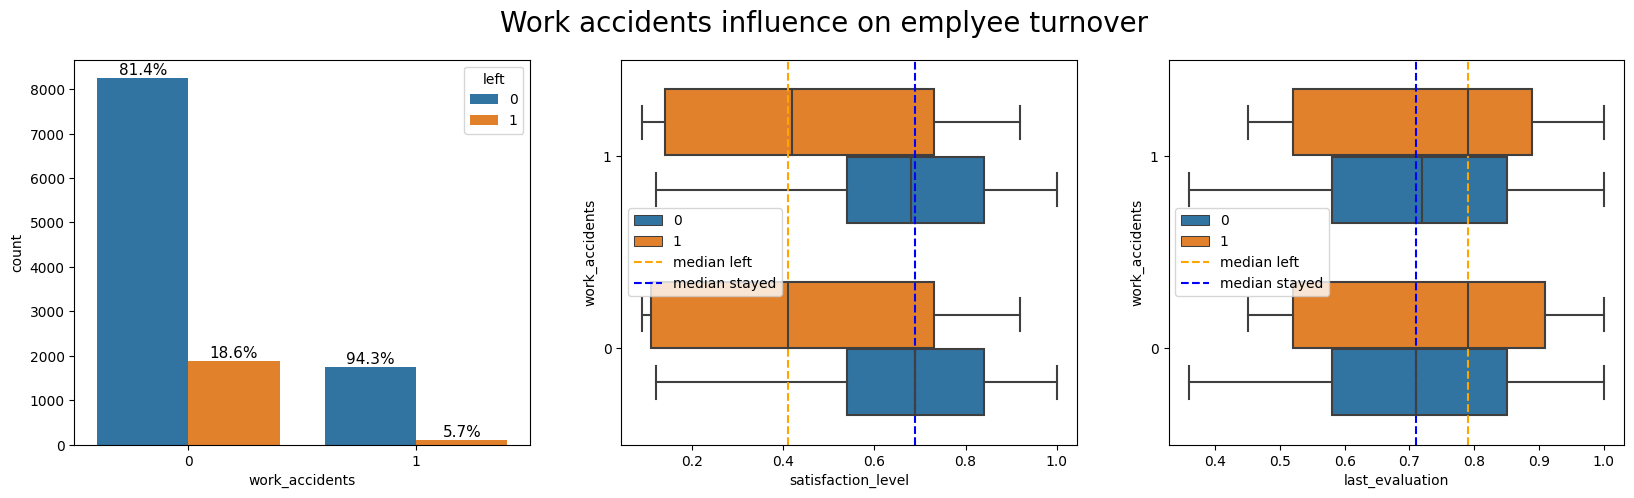

In [15]:
#plotting work accident related plots
fig, ax = plt.subplots(nrows = 1 , ncols = 3, figsize = (20,5))
ax0 = sns.countplot(ax = ax[0], data = df, x = 'work_accidents', hue = 'left')
plt.xlabel('proportion of employees who experience an accident at work')

#geting percentage marks to put on top of the bars
lista = df.groupby('work_accidents')['left'].value_counts(normalize = True)*100
for j, bars in enumerate(ax0.containers):
    for i, p in enumerate(bars):     
        percentage = f'{lista[i][j] :.1f}%'
        ax0.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

ax1 = sns.boxplot(ax = ax[1], data = df, x = 'satisfaction_level' , y = 'work_accidents', hue = 'left' , orient = 'h', width = 0.7 )
#adding 2 median lines for clearer reading of the graph
ax1.axvline( df.loc[ (df['left'] == 1),'satisfaction_level'].median(), c = 'orange' , linestyle = '--',label='median left')
ax1.axvline( df.loc[ (df['left'] == 0),'satisfaction_level'].median(), c = 'blue' , linestyle = '--',label='median stayed')  
ax1.invert_yaxis()  #to flip the y axis
ax1.legend() 

ax2 = sns.boxplot(ax = ax[2], data = df, x = 'last_evaluation' , y = 'work_accidents', hue = 'left' , orient = 'h', width = 0.7 )
ax2.axvline( df.loc[ (df['left'] == 1),'last_evaluation'].median(), c = 'orange' , linestyle = '--',label='median left')
ax2.axvline( df.loc[ (df['left'] == 0),'last_evaluation'].median(), c = 'blue' , linestyle = '--',label='median stayed')  
ax2.invert_yaxis()
ax2.legend()

plt.suptitle('Work accidents influence on emplyee turnover', fontsize = 20) 
plt.show()

Surprisingly, we see the reverse tendency, the part of the people who stay in the company have a higher percentage of work accidents than the ones that left. 
The medians of the satisfaction level and the last evaluation distributions with respect to the work_accidents flag, does not change. We conclude that work_accident flag has no influence on the decision to quit.

Common sense would suggest that experiencing a work accident should influence one of the factors visualized above - either a person decides to quit, or is less satisfied (if it's not their fault and/or they are harmed) or is evaluated lower(if it's their fault and/or others are harmed). 
The fact that work_accident flag is on for almost 20% of the entire company suggests that the feature is very general and may contain too wide range of "accidents" for the feature to be considered a reliable factor. This hypothesis is also confirmed by no change in satisfaction or evaluation levels for people who did and did not experience a work accident.

An improvement could be to provide more precise data on accidents in the company.

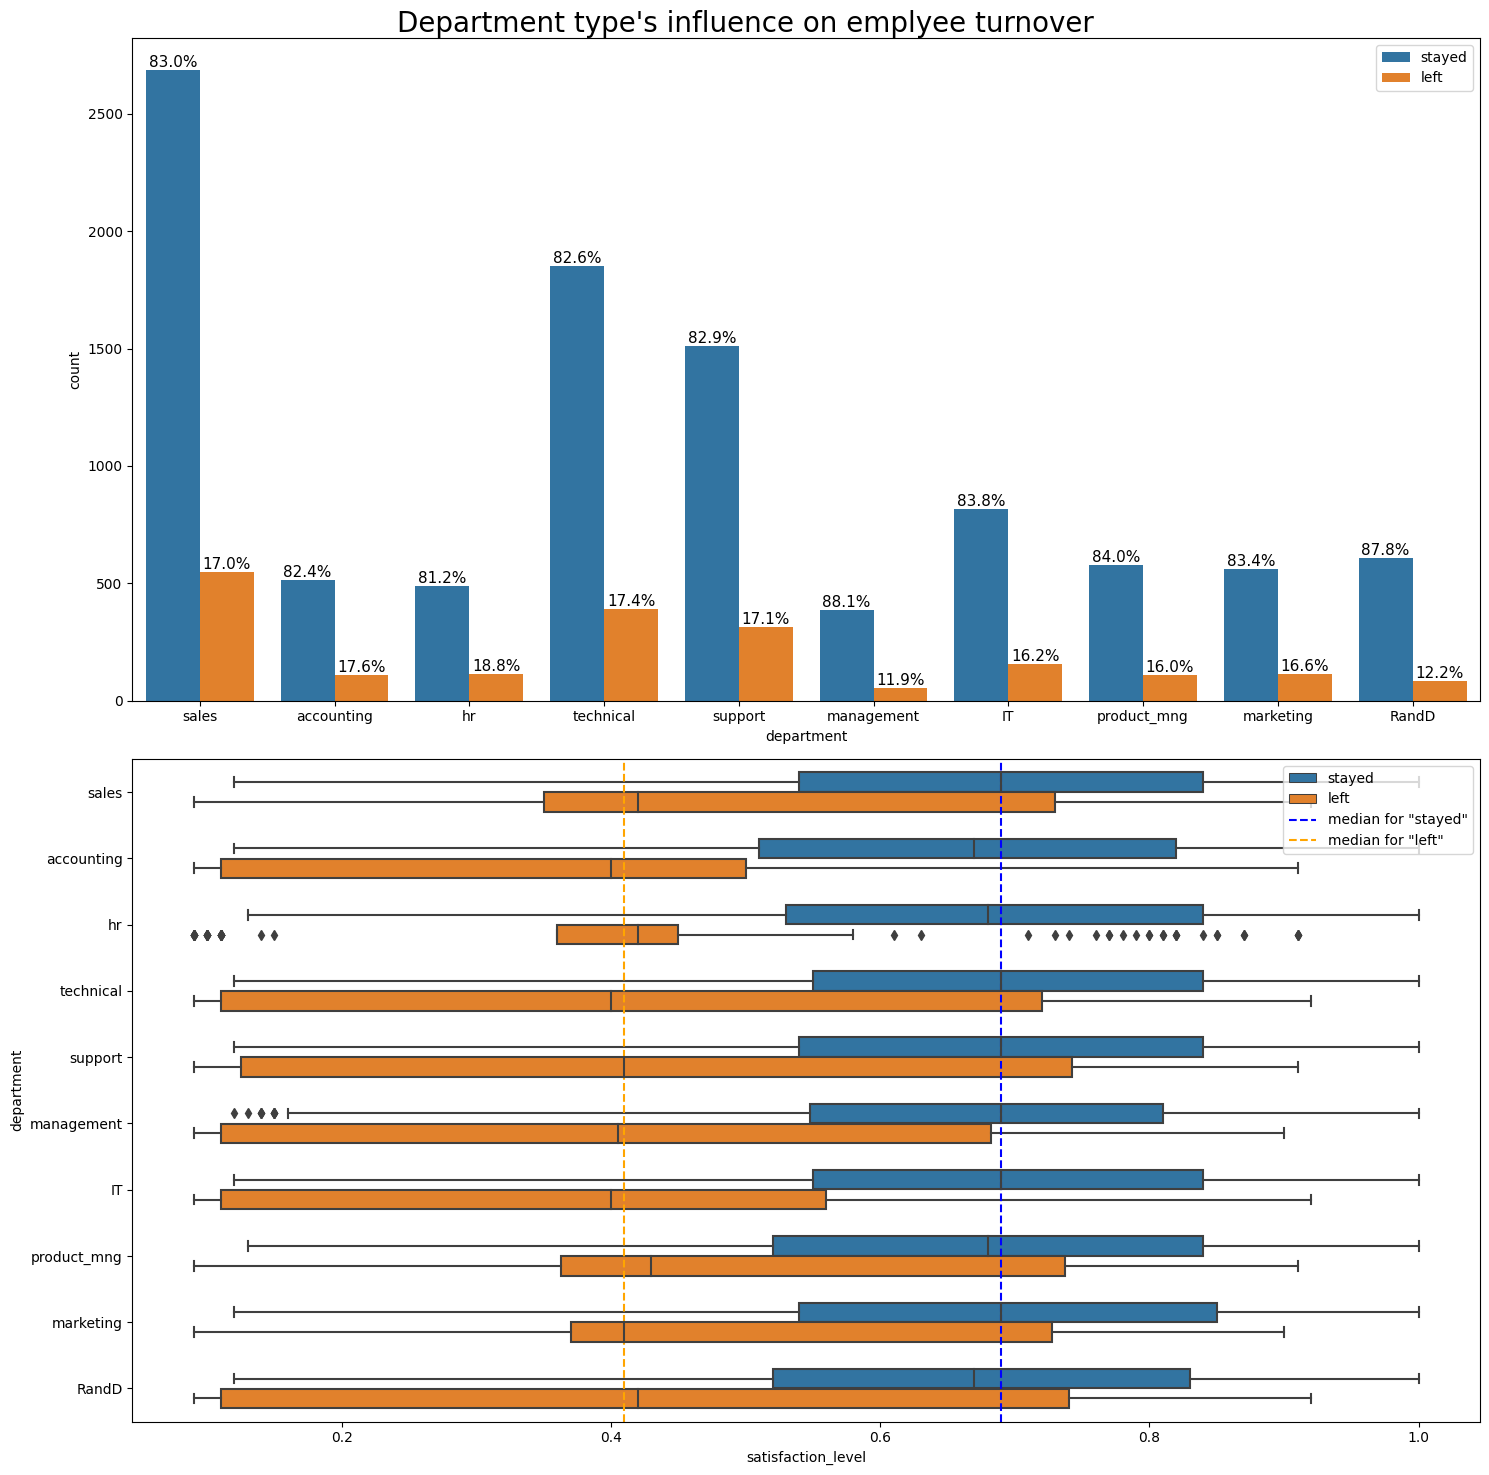

In [16]:
fig, ax = plt.subplots(nrows = 2 , ncols = 1, figsize = (15,15))

#plotting department related graphs

ax0 = sns.countplot(ax = ax[0], data = df, x = 'department', hue = 'left')
ax0.legend(labels = ['stayed','left'])
#geting percentage marks to put on top of the bars
lista = df.groupby('department')['left'].value_counts(normalize = True)*100
lista_dep = df['department'].unique()
for j, bars in enumerate(ax0.containers):
    for i, p in enumerate(bars): 
        percentage = f'{lista[lista_dep[i]][j] :.1f}%'
        ax0.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

        
ax1 = sns.boxplot(ax = ax[1], data = df, x = 'satisfaction_level' , y = 'department', hue = 'left' , orient = 'h', width = 0.6 )
ax1.axvline( df.loc[ df['left'] == 0, 'satisfaction_level' ].median(), c = 'blue' , linestyle = '--',label='median for "stayed"')  
ax1.axvline( df.loc[ df['left'] == 1, 'satisfaction_level' ].median(), c = 'orange' , linestyle = '--',label='median for "left"') 
handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend( handles,['stayed','left','median for "stayed"','median for "left"'], loc = 'upper right')


plt.suptitle("Department type's influence on emplyee turnover", fontsize = 20) 
plt.tight_layout()
plt.show()

The Department type does not indicate employees' likelihood for quitting. The proportion of people who quitted various departments is more or less constant, with 2 exceptions - the management and RnD departments have a lower ratio of quitting. All the others are the same +/- 1%. This suggests that department of origin doesn't really influences the decision to quit. However, the difference between the 2 outliers and the rest may be investigated further. Before we jump into that let's look at the 3rd feature that didn't show a direct connection with the 3 groups found on the evaluation vs satisfaction map - salary  

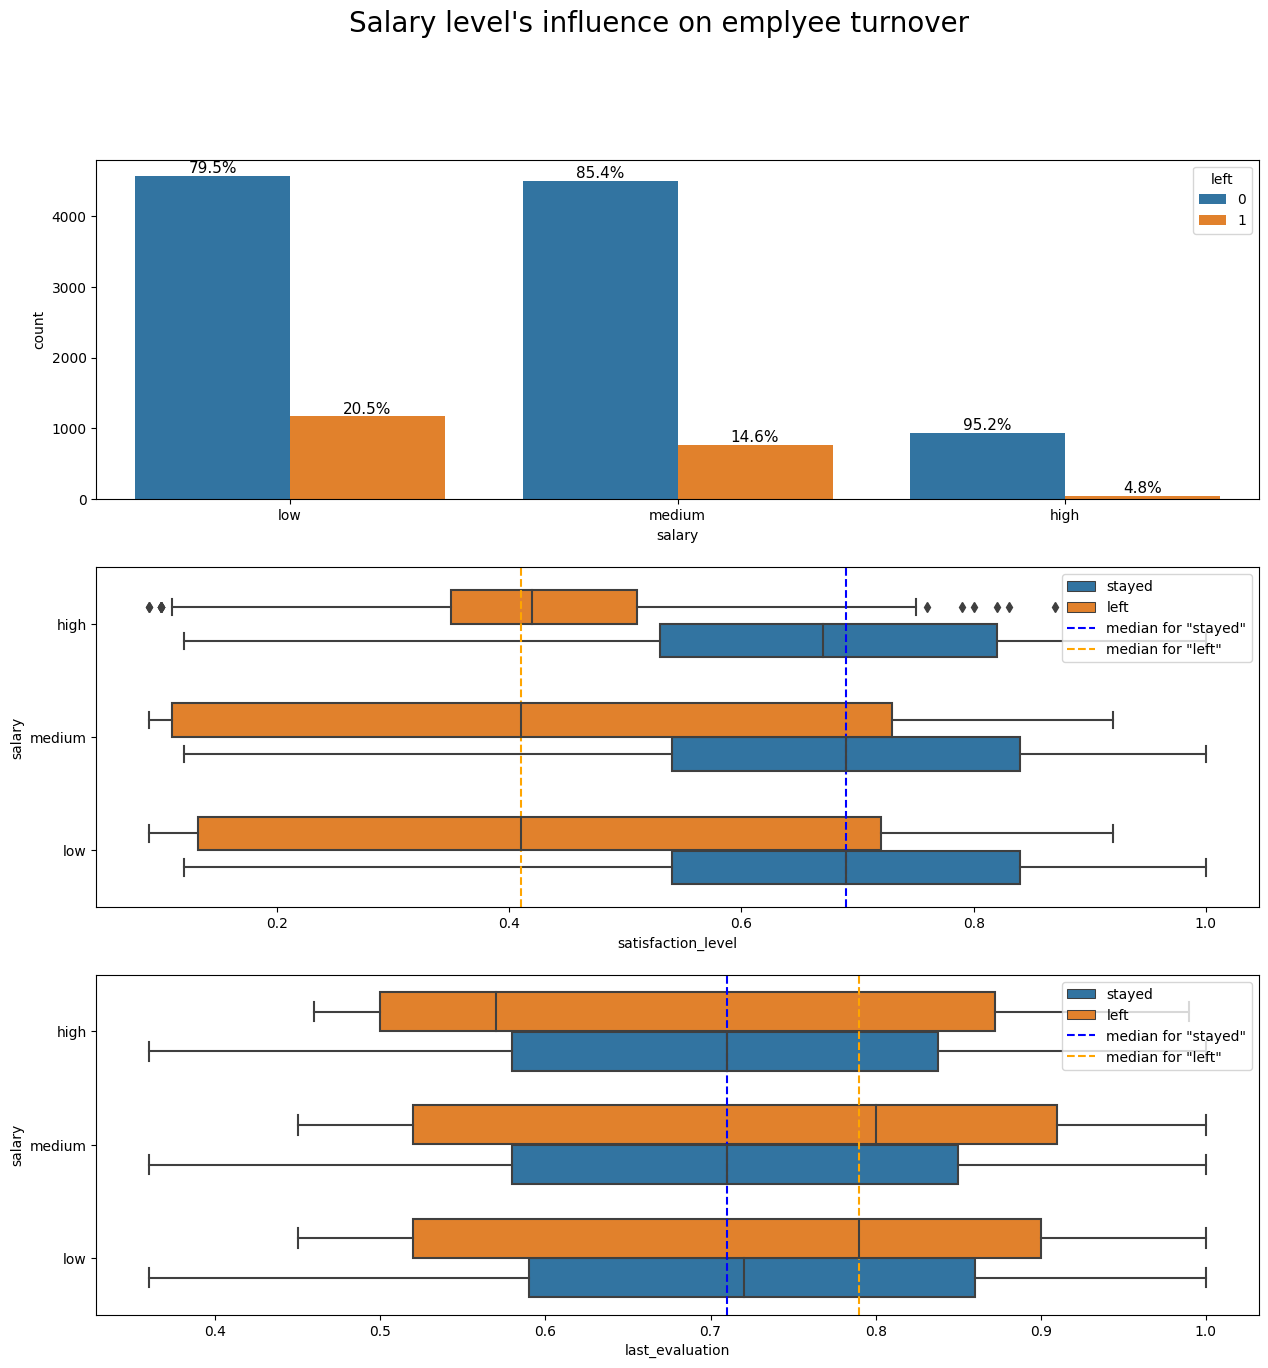

In [17]:
fig, ax = plt.subplots(nrows = 3 , ncols = 1, figsize = (15,15))


ax0 = sns.countplot(ax = ax[0], data = df, x = 'salary', hue = 'left')
lista = df.groupby('salary')['left'].value_counts(normalize = True)*100
lista_dep = df['salary'].unique()
for j, bars in enumerate(ax0.containers):
    for i, p in enumerate(bars): 
        percentage = f'{lista[lista_dep[i]][j] :.1f}%'
        ax0.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

        
ax1 = sns.boxplot(ax = ax[1], data = df, x = 'satisfaction_level' , y = 'salary', hue = 'left' , orient = 'h', width = 0.6  )
ax1.axvline( df.loc[ df['left'] == 0, 'satisfaction_level' ].median(), c = 'blue' , linestyle = '--',label='median for "stayed"')  
ax1.axvline( df.loc[ df['left'] == 1, 'satisfaction_level' ].median(), c = 'orange' , linestyle = '--',label='median for "left"')  
ax1.invert_yaxis()
handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend( handles,['stayed','left','median for "stayed"','median for "left"'], loc = 'upper right')

ax2 = sns.boxplot(ax = ax[2], data = df, x = 'last_evaluation' , y = 'salary', hue = 'left' , orient = 'h', width = 0.7 )
ax2.axvline( df.loc[ (df['left'] == 0),'last_evaluation'].median(), c = 'blue' , linestyle = '--',label='median stayed')  
ax2.axvline( df.loc[ (df['left'] == 1),'last_evaluation'].median(), c = 'orange' , linestyle = '--',label='median left')
ax2.invert_yaxis()
handles, labels  =  ax2.get_legend_handles_labels()
ax2.legend( handles,['stayed','left','median for "stayed"','median for "left"'], loc = 'upper right')
plt.suptitle("Salary level's influence on emplyee turnover", fontsize = 20) 
plt.show()

Looking at the graphs on salary, we can see that the turnout decreases with the height of the salary. At the same time, people who left declare significantly lower satisfaction regardless of the salary level. In the case of the evaluation, the highest earners who left performed worse that theit counterpart who remain in the company. On the lower levels the trend is reversed and people who had higher evaluation tend to leave the company.


It may be interesting to look at the salary in each od the departments.

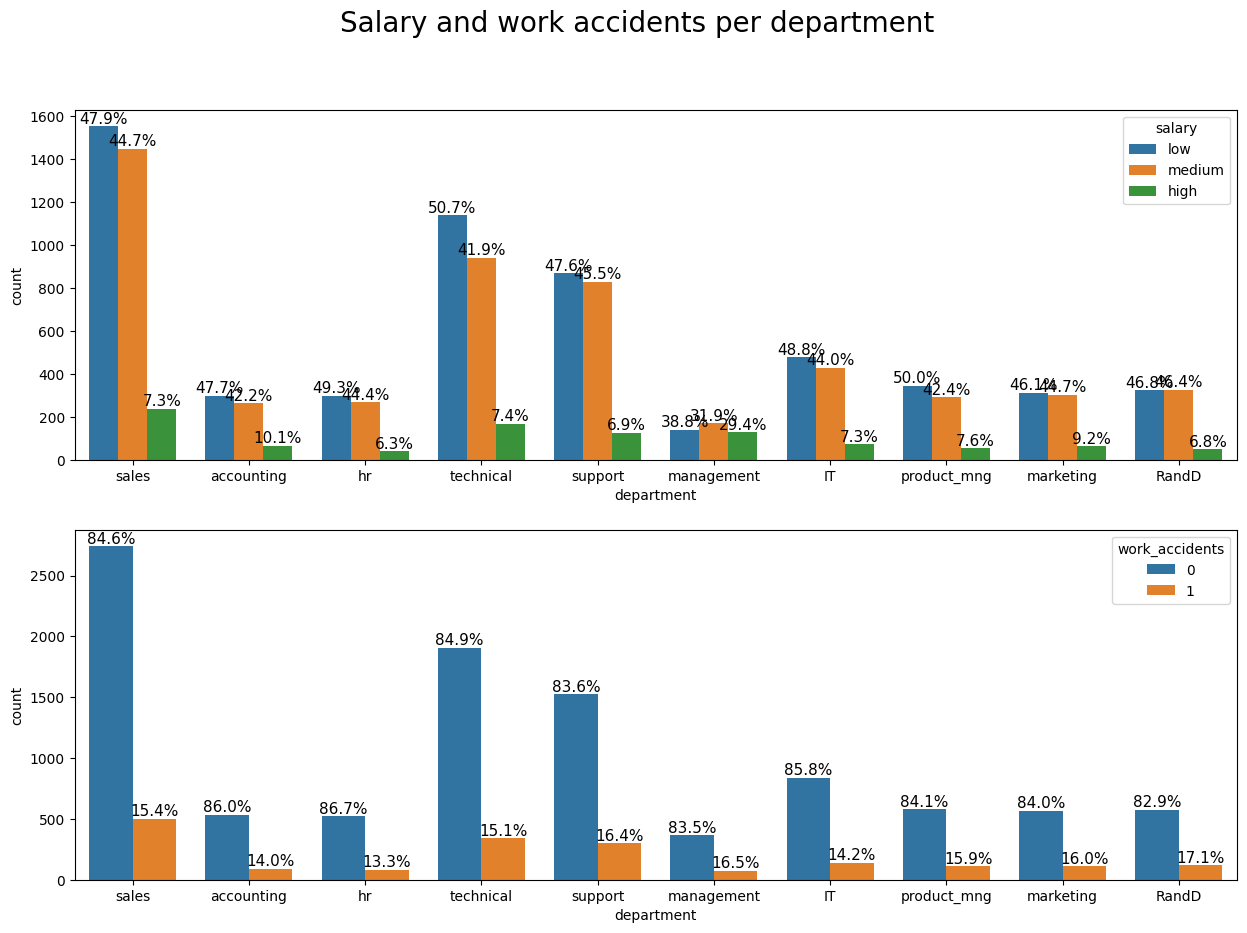

In [18]:
fig, ax = plt.subplots(nrows = 2 , ncols = 1, figsize = (15,10))

#plotting salary related graphs
ax0 = sns.countplot(ax = ax[0], data = df, x = 'department', hue = 'salary',width = 0.75)

#getting percentage marks to put on top of the histogram bars
lista = df.groupby('department')['salary'].value_counts(normalize = True)*100
lista_dep = df['department'].unique()
for j, bars in enumerate(ax0.containers):
    for i, p in enumerate(bars): 
        percentage = f'{lista[lista_dep[i]][j] :.1f}%'
        ax0.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


ax1 = sns.countplot(ax = ax[1], data = df, x = 'department', hue = 'work_accidents',width = 0.75)

#again percentage mark formula
lista = df.groupby('department')['work_accidents'].value_counts(normalize = True)*100
lista_dep = df['department'].unique()
for j, bars in enumerate(ax1.containers):
    for i, p in enumerate(bars): 
        percentage = f'{lista[lista_dep[i]][j] :.1f}%'
        ax1.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

plt.suptitle("Salary and work accidents per department", fontsize = 20) 
plt.show()

The graphs above show that the management department has disproportionally many high earners. This may be the reason for them to have a lower level of quitting, as employees with high salary tend to stay in the company. 

For RnD department, the reason for having less tendency to quit is not clear yet. 

### ***Checkpoint summary***

- The work accident feature doesn't seem to be an indicative of an increased likelihood for quitting. The proportion of accidents in the quitting group is even smaller than that in the staying group. The distribution is also fairly even across the departments. Interestingly, the total percentage of people who experienced "work_accident" is about 18%, which is quite high. This suggests that an "accident" from this column is understood in a very wide sense and includes all kind of incidents. This is also suggested by the fact that experiencing a work accident doesn't influence neither self declared work satisfaction, nor work evaluation mark given by the company

- The salary is a fairly good indicator of staying, as the proportion of people who left is smaller the higher the salary level is. Interestignly, the people who left performed better at lower salary levels, but at the highest salary level, their median performance is much worse than the median of the people who stay in the company. The satisfaction difference between salary levels is minimal, the median for people who quitted is consistently lower than for the people who stay.

- In each department the percentage of quitters at the same level, except for the management and RnD departmetns. The lower rate of quitting in the management department has been initially explained by the much higher that normal ratio of high salaries in the department. The reason for the RnD department is not yet clear.

Now, we move towards the features that seem to be more important. 
- `number of projects`
- `average monthly hours`
- `year in company`



We will start with years in company. We're gonna investigate the feature using the boxplot and a histogram.

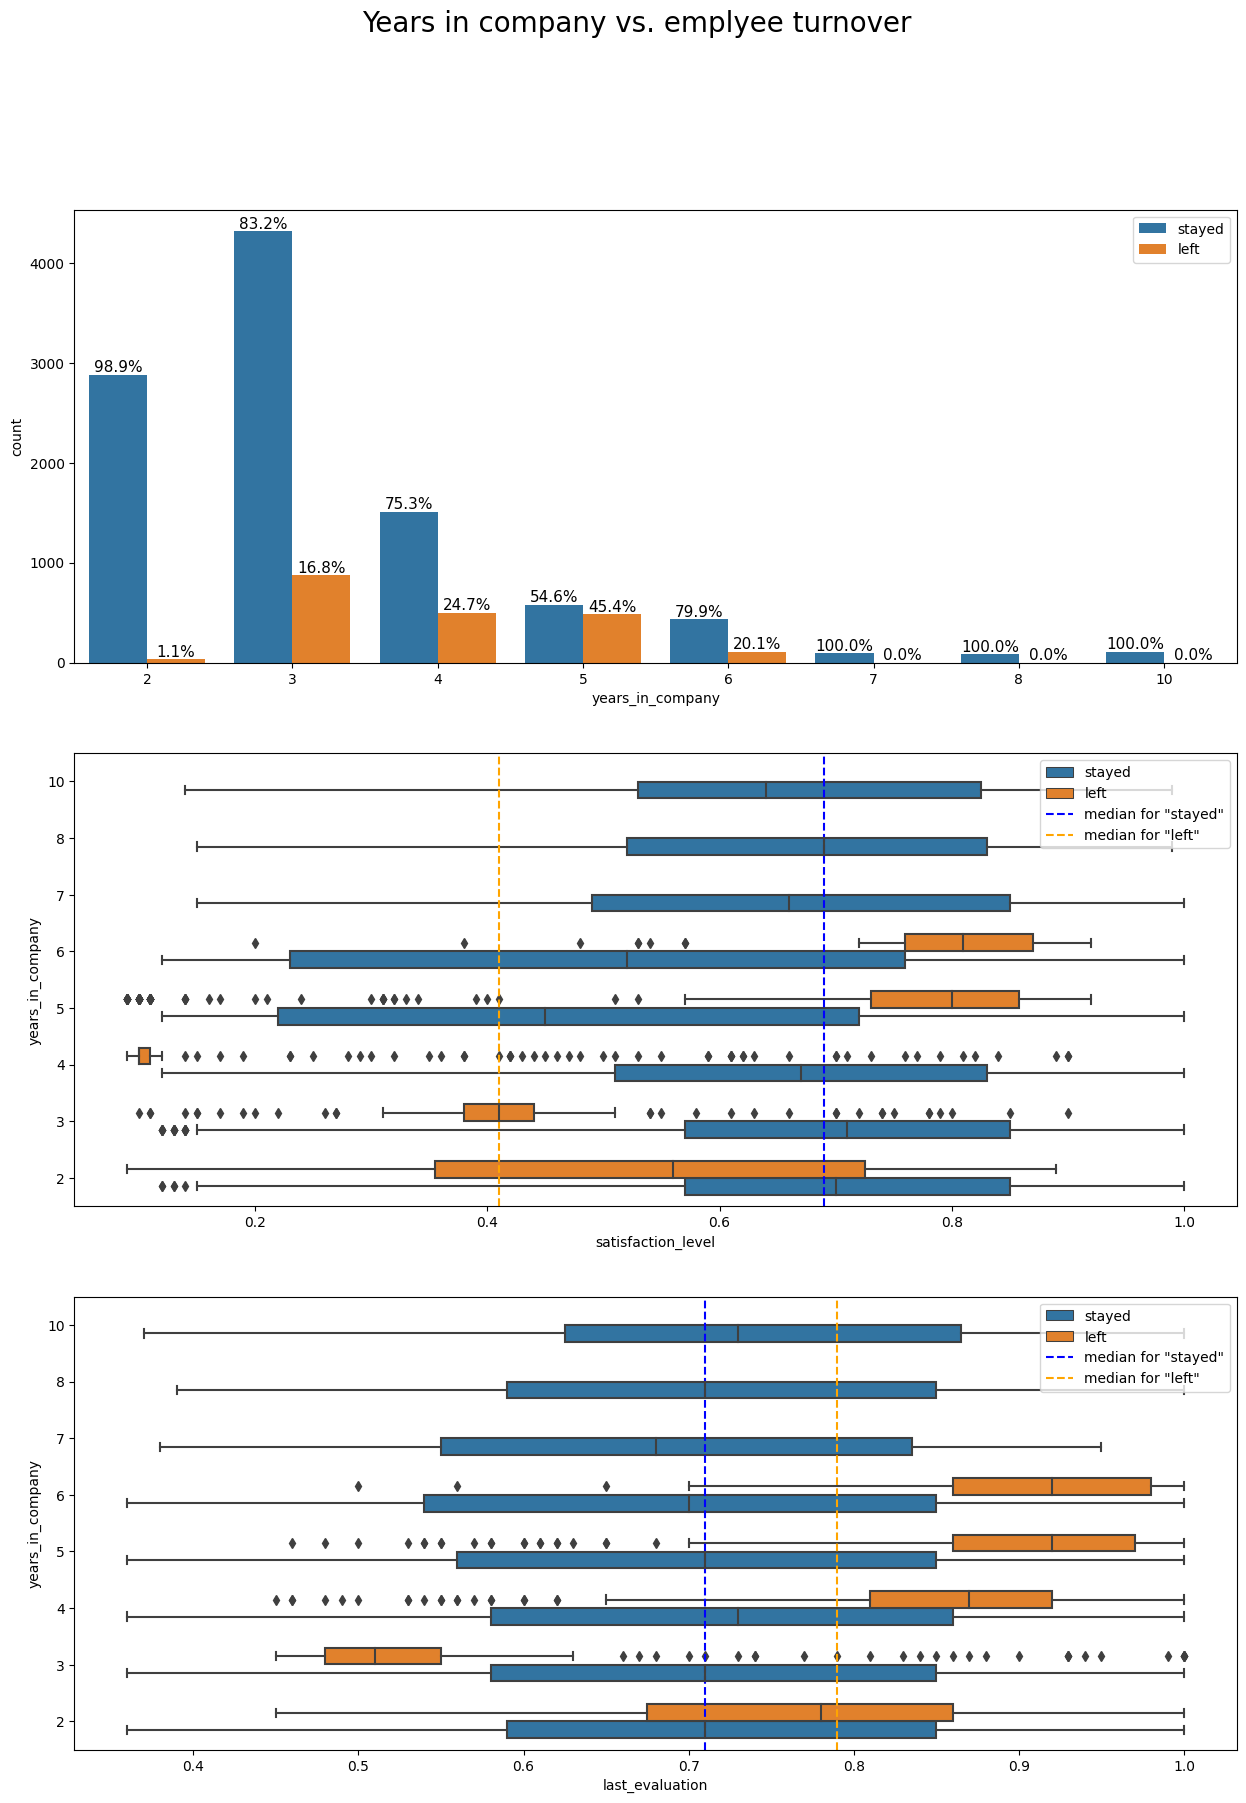

In [19]:
fig, ax = plt.subplots(nrows = 3 , ncols = 1, figsize = (15,20))


ax0 = sns.countplot(ax = ax[0], data = df, x = 'years_in_company', hue = 'left')

# converting 'left' column to category type, to obtain 0 in a .value_counts() method
df['left'] = df['left'].astype('category')
# getting percentage marks again
lista = df.groupby('years_in_company')['left'].value_counts(normalize = True)*100
lista_dep = np.sort(df['years_in_company'].unique())
for j, bars in enumerate(ax0.containers):
    for i, p in enumerate(bars): 
        percentage = f'{lista[lista_dep[i]][j] :.1f}%'
        ax0.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
handles, labels  =  ax1.get_legend_handles_labels()
ax0.legend( handles,['stayed','left'], loc = 'upper right')
        
ax1 = sns.boxplot(ax = ax[1], data = df, x = 'satisfaction_level' , y = 'years_in_company', hue = 'left' , orient = 'h', width = 0.6  )
ax1.axvline( df.loc[ df['left'] == 0, 'satisfaction_level' ].median(), c = 'blue' , linestyle = '--',label='median for "stayed"')  
ax1.axvline( df.loc[ df['left'] == 1, 'satisfaction_level' ].median(), c = 'orange' , linestyle = '--',label='median for "left"')  
ax1.invert_yaxis()
handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend( handles,['stayed','left','median for "stayed"','median for "left"'], loc = 'upper right')

ax2 = sns.boxplot(ax = ax[2], data = df, x = 'last_evaluation' , y = 'years_in_company', hue = 'left' , orient = 'h', width = 0.6  )
ax2.axvline( df.loc[ df['left'] == 0, 'last_evaluation' ].median(), c = 'blue' , linestyle = '--',label='median for "stayed"')  
ax2.axvline( df.loc[ df['left'] == 1, 'last_evaluation' ].median(), c = 'orange' , linestyle = '--',label='median for "left"')  
ax2.invert_yaxis()
handles, labels  =  ax2.get_legend_handles_labels()
ax2.legend( handles,['stayed','left','median for "stayed"','median for "left"'], loc = 'upper right')
plt.suptitle("Years in company vs. emplyee turnover", fontsize = 20) 
plt.show()

Looking at the histogram we can immidiately see that the critical moment for an employee comes after tehe 3rd year of work. Basically all employees who left were between 3 and 6 years of work, with the highest absolute numbre being on the 3rd year and having 45% people of people at 5th year of work quit.

When we observe the satisfaction we can see that people who reported lower satisfaction in the early years of the company career. The breakthrough seems to be the 4th year, where the median of people who quit is the lowest - around 0.1. Interestingly, among people who pass the "4th years gap", people quitting are more satisfied than those who stay. It's worth mentioning that the satisfaction median after year 4 drops drastically among people who stayand only recovers after year 7

The evaluation scores show a general trend of quitter outperforming people who remained, The only exception is years 3, where people who left get significanlty lower evaluation scores than the reamining ones.

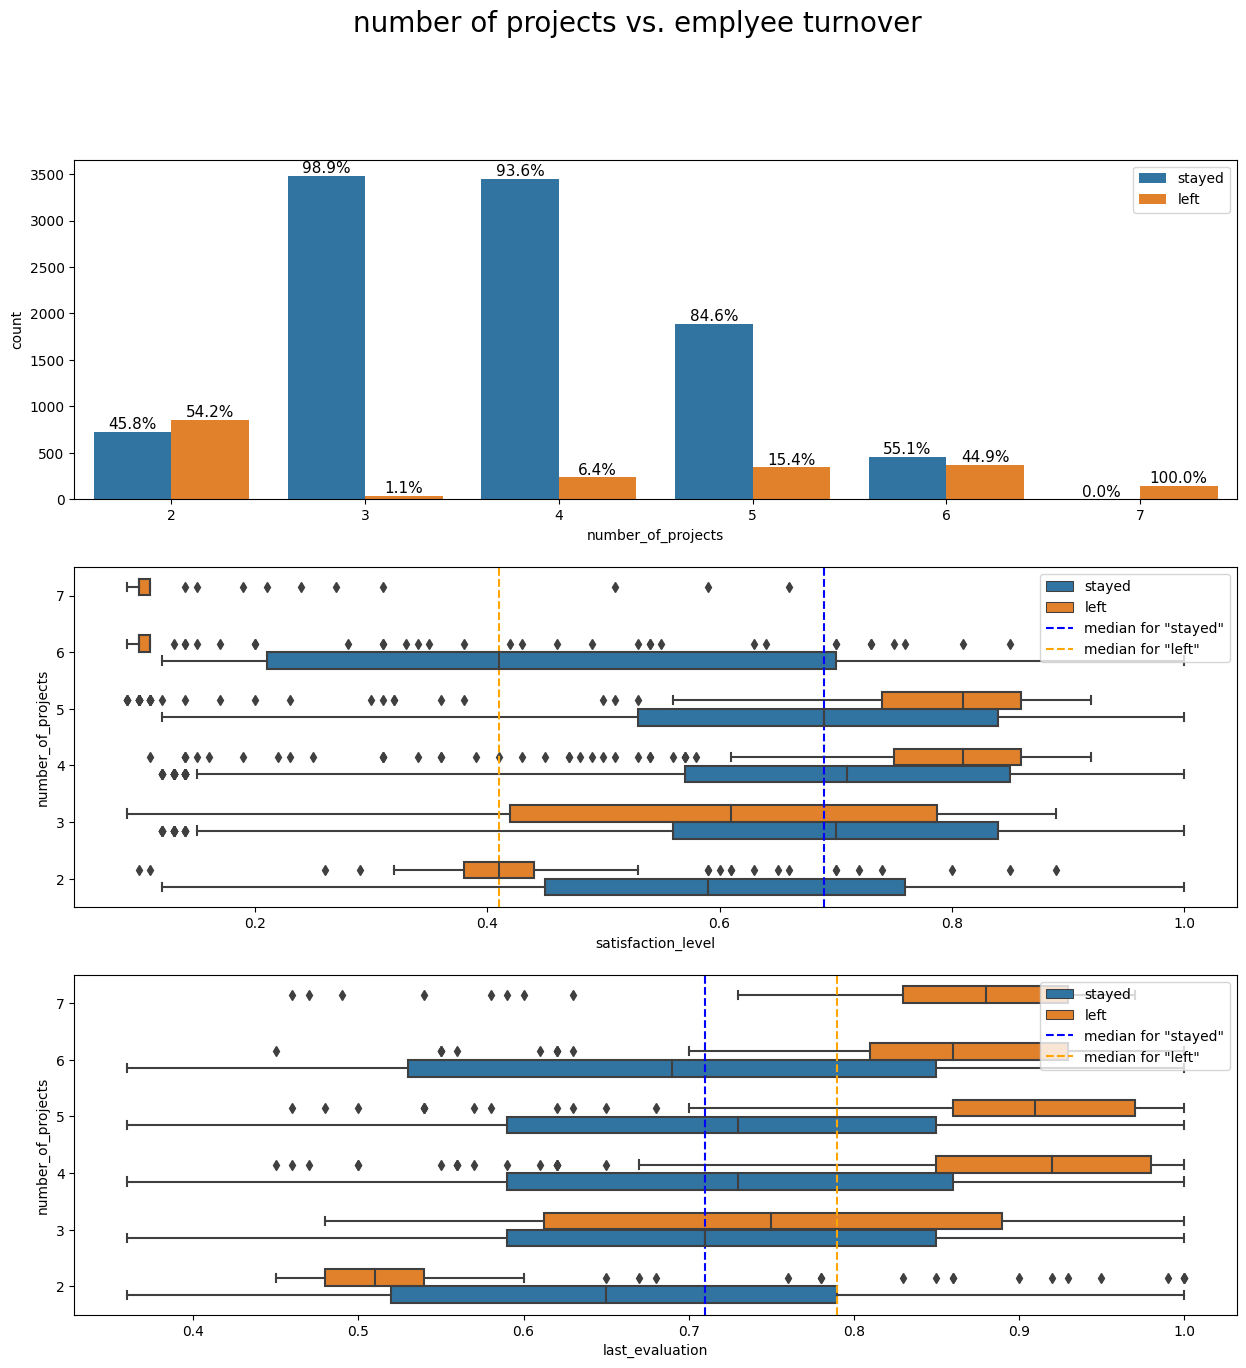

In [20]:
fig, ax = plt.subplots(nrows = 3 , ncols = 1, figsize = (15,15))


ax0 = sns.countplot(ax = ax[0], data = df, x = 'number_of_projects', hue = 'left')
df['number_of_projects'].astype('category')
lista = df.groupby('number_of_projects')['left'].value_counts(sort = False,normalize = True)*100
lista_dep = np.sort(df['number_of_projects'].unique())
for j, bars in enumerate(ax0.containers):
    for i, p in enumerate(bars): 
        percentage = f'{lista[lista_dep[i]][j] :.1f}%'
        ax0.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
handles, labels  =  ax0.get_legend_handles_labels()
ax0.legend( handles,['stayed','left'], loc = 'upper right')
        
ax1 = sns.boxplot(ax = ax[1], data = df, x = 'satisfaction_level' , y = 'number_of_projects', hue = 'left' , orient = 'h', width = 0.6  )
ax1.axvline( df.loc[ df['left'] == 0, 'satisfaction_level' ].median(), c = 'blue' , linestyle = '--',label='median for "stayed"')  
ax1.axvline( df.loc[ df['left'] == 1, 'satisfaction_level' ].median(), c = 'orange' , linestyle = '--',label='median for "left"')  
ax1.invert_yaxis()
handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend( handles,['stayed','left','median for "stayed"','median for "left"'], loc = 'upper right')

ax2 = sns.boxplot(ax = ax[2], data = df, x = 'last_evaluation' , y = 'number_of_projects', hue = 'left' , orient = 'h', width = 0.6  )
ax2.axvline( df.loc[ df['left'] == 0, 'last_evaluation' ].median(), c = 'blue' , linestyle = '--',label='median for "stayed"')  
ax2.axvline( df.loc[ df['left'] == 1, 'last_evaluation' ].median(), c = 'orange' , linestyle = '--',label='median for "left"')  
ax2.invert_yaxis()
handles, labels  =  ax2.get_legend_handles_labels()
ax2.legend( handles,['stayed','left','median for "stayed"','median for "left"'], loc = 'upper right')
plt.suptitle("number of projects vs. emplyee turnover", fontsize = 20) 
plt.show()

The histogram of the number of projects allow to notice a few trends. Firstly lamost half of the people with 2 projects left. Since their evaluation scores and reported satisfaction is low, we may guess that these are the people that company wants to get rid of / have already declared themelves leaving but are still in the company. Hence, the company would decrease the amount of work assigned to them and start a process of replacing them with new people.

Another remark is that 2 and 4 projects generate the least amount of quitters. Above 4  projects, the proportion of quitters become more and more significant until it reaches 100% for 7 projects. We may guess that overworking is a major factor in the decision to quit. 

It is impotant to note that the evaluation of people who left is consistently better for all populations with more than 2 projects. The satisfaction drops drastically at 6 projects and is more or less on a stable level between 4 and 5.

Number of projects should be closely connected to the number of working hours. Since we already have an indication that overloading with work leads to quitting, let's investigate this trope further by nvestigating number of hours.

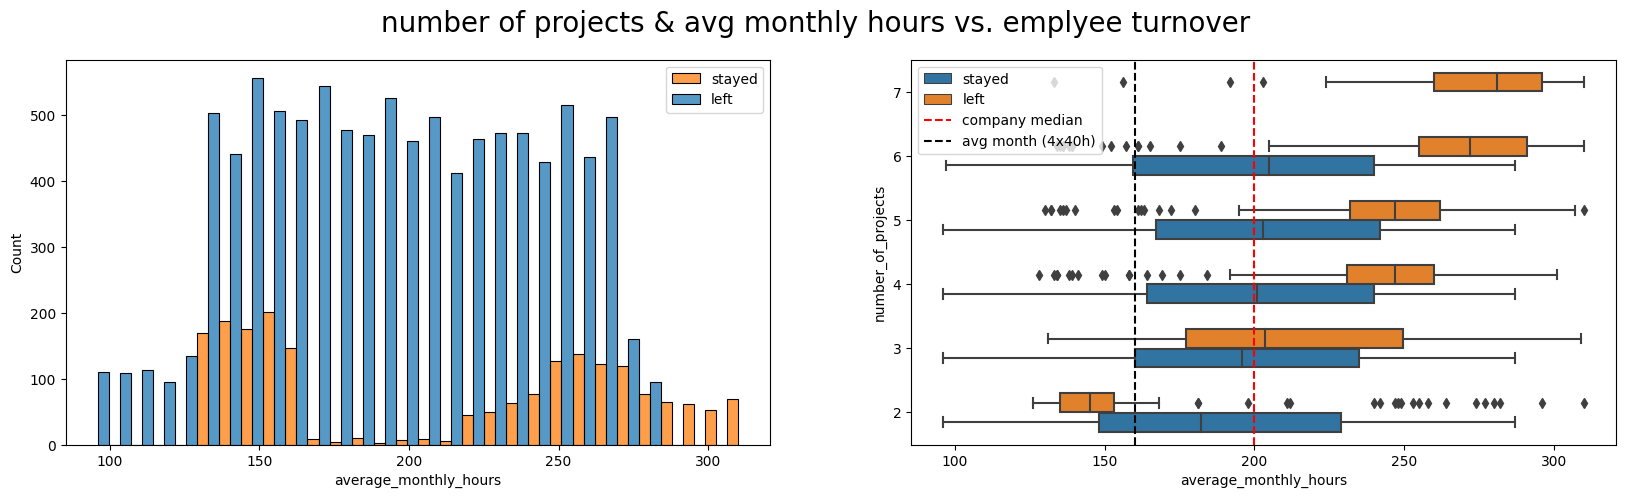

In [21]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2, figsize = (20,5))


ax0 = sns.histplot(ax = ax[0], data = df, x = 'average_monthly_hours', hue = 'left', multiple = 'dodge')
ax0.legend( labels = ['stayed','left'])


ax1 = sns.boxplot(ax = ax[1], data = df, x = 'average_monthly_hours' , y = 'number_of_projects', hue = 'left' , orient = 'h', width = 0.6  )
ax1.axvline(df['average_monthly_hours'].median(), c = 'red' , linestyle = '--',label='company median')  
ax1.axvline( 160, c = 'black' , linestyle = '--',label='avg month (4x40h)')  
ax1.invert_yaxis()
handles, labels  =  ax1.get_legend_handles_labels()
ax1.legend( handles,['stayed','left','company median','avg month (4x40h)'], loc = 'upper left')

plt.suptitle("number of projects & avg monthly hours vs. emplyee turnover", fontsize = 20) 
plt.show()

The histogram shows pretty clearly that people who quitted were the workers with the highest amount of hours reported in the company. What's remarkable is that the amount of hours reported in the dataset is insane as an average working time - some people work on average an equivalent of 8 weeks per month! The company has a very clear problem with overworking.

The median working hours for people who stayed doesn't vary much regardless of the number of project people are assigned to. On the other hand, the median of people who left the company increases with the number of projects and is consistently higher that those who stay. The only exception from this rule is the case of being assigned 2 projects, but, as discussed above it is most probably a group of people who were on the way out of the company at the time of prepraing the dataset.

The optimal amount of project seem to be abt 3-4, where the proportion of people leaving is the lowest. From the box plot we can also read that in the case of 3 projects, the median avg hours at work differ the least between the ones who left and stayed, hence its impact on the decision to quit is the lowest.

### ***Checkpoint summary***

***`years_in_company`***

Year 3 and 4 are the years where people are the most dissatisfied and have a growing tendency to leave, that peaks at 5th year of tenure. People who leave generally outperform their counterparts regardless of the tenure time, with an exception of 3 years in the company stage. It's possible that the exception comes from the company who tries to remove bad workers and that evaluation period is 3 years.

***`number_of-projects`***

The optimal number of projects seems to be 3-4 People with 7 projects all left. The company needs 

***`average_monthly_hours`***

The amount of hours in the company is insane. people who quitted work on average much longer than the people who stayed. However, the median avg monthly hours in the company is way above a 40 hrs week. People are generally overworked in the company.


Now, since we see that people who work longer and in a bigger number of projects have higher tendency to leave. We will try to look up at the available in the dataset forms of compensations for the effort. Since the dissatisfaction has a peak at year 4, we may suspect that there is a problem with promotions.

Now our goal will be to verify if hard workers get better compensations than an average worker.

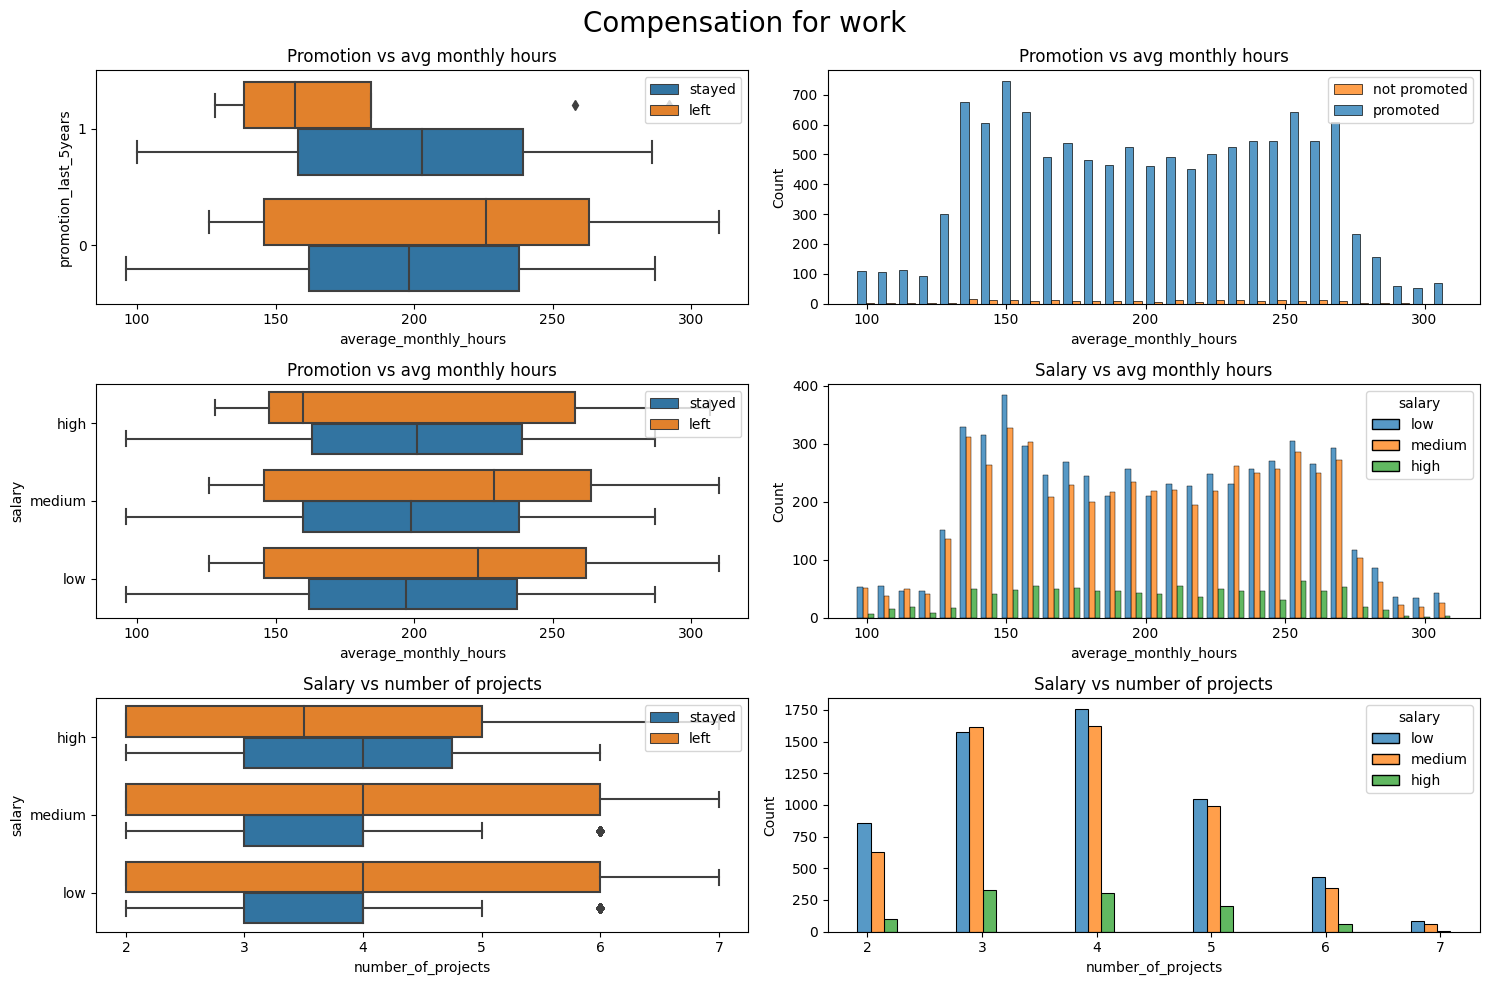

In [22]:
fig, ax = plt.subplots(nrows= 3, ncols = 2 , figsize = (15,10))
df['promotion_last_5years'] = df['promotion_last_5years'].astype('category')

ax0  = sns.boxplot(ax = ax[0,0], data = df, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left' )
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, ['stayed','left'], loc = 'upper right')
ax0.set_title('Promotion vs avg monthly hours')
ax0.invert_yaxis()


ax1  = sns.histplot(ax = ax[0,1], data = df, x = 'average_monthly_hours',  hue = 'promotion_last_5years', multiple = 'dodge', shrink = 0.8 )
ax1.set_title('Promotion vs avg monthly hours')
ax1.legend(labels = ['not promoted','promoted'],loc = 'upper right')

ax2  = sns.boxplot(ax = ax[1,0], data = df, x = 'average_monthly_hours', y = 'salary', hue = 'left' )
ax2.set_title('Salary vs avg monthly hours')
ax2.invert_yaxis()
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, ['stayed','left'], loc = 'upper right')
ax2.set_title('Promotion vs avg monthly hours')

ax3  = sns.histplot(ax = ax[1,1], data = df, x = 'average_monthly_hours',  hue = 'salary', multiple = 'dodge', shrink = 0.8 )
ax3.set_title('Salary vs avg monthly hours')

ax4  = sns.boxplot(ax = ax[2,0], data = df, x = 'number_of_projects', y = 'salary', hue = 'left' )
ax4.set_title('Salary vs number of projects')
ax4.invert_yaxis()
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, ['stayed','left'], loc = 'upper right')

ax5  = sns.histplot(ax = ax[2,1], data = df, x = 'number_of_projects',  hue = 'salary', multiple = 'dodge', shrink = 2 )
ax5.set_title('Salary vs number of projects')



plt.suptitle('Compensation for work', fontsize = 20)
plt.tight_layout()
plt.show()

The set of graphs show that the compensation for working more is not existing

1. The median of people who got promoted is only slightly higher than for people who didn't get it. Among those who got the promotion, people who the median of avg monthly hours worked y the people who left is lower than that of the people who stayed. The median of people who left and didn't get any promotion is significantly higher than the people who stayed, and higher than people whogot promoted. The histogram seems to confirm the impression, that working long hours doesn't not lead to a promotion.

2. The median of monthly hours worked for people who stayed in the company doesn't change much across salary levels. Similarly to the previous graph, people who left worked significantly longer than people who stayed on the lower salary levels. Surprisingly, people who left at the higest salary level worked less than people who stayed. Possibly they lost interest?

3. People who left and receive low to medium salary have their median number of projects higher than those who stay in the company. The histogram shows also that the there are no high-paid employees with 7 projects. Another indicative that working more (longer hours and with more projects) is not rewarded in the company

In conclusion, neither working long hours nor participating in many projects impacts chances for salary raise or a promotion. Long and hard work is not properly compensated in the company. In addition the working hours are extremely long with median way above 160h working month. It's worth noticing that the group that left worked significantly more and longer at each corresponding level of salary (except the higest), usually with higher number of projects and, as we know from prevous analysis, with higher evaluation score. 

What would be good to have if possible is the exact salaries, as having just 3 levels is firstly not very precise and secondly, is not clear if it's an absolute level or realtive to the position one has. More data would help the model.

Lastly let's take a look on how loyalty pays off in the company

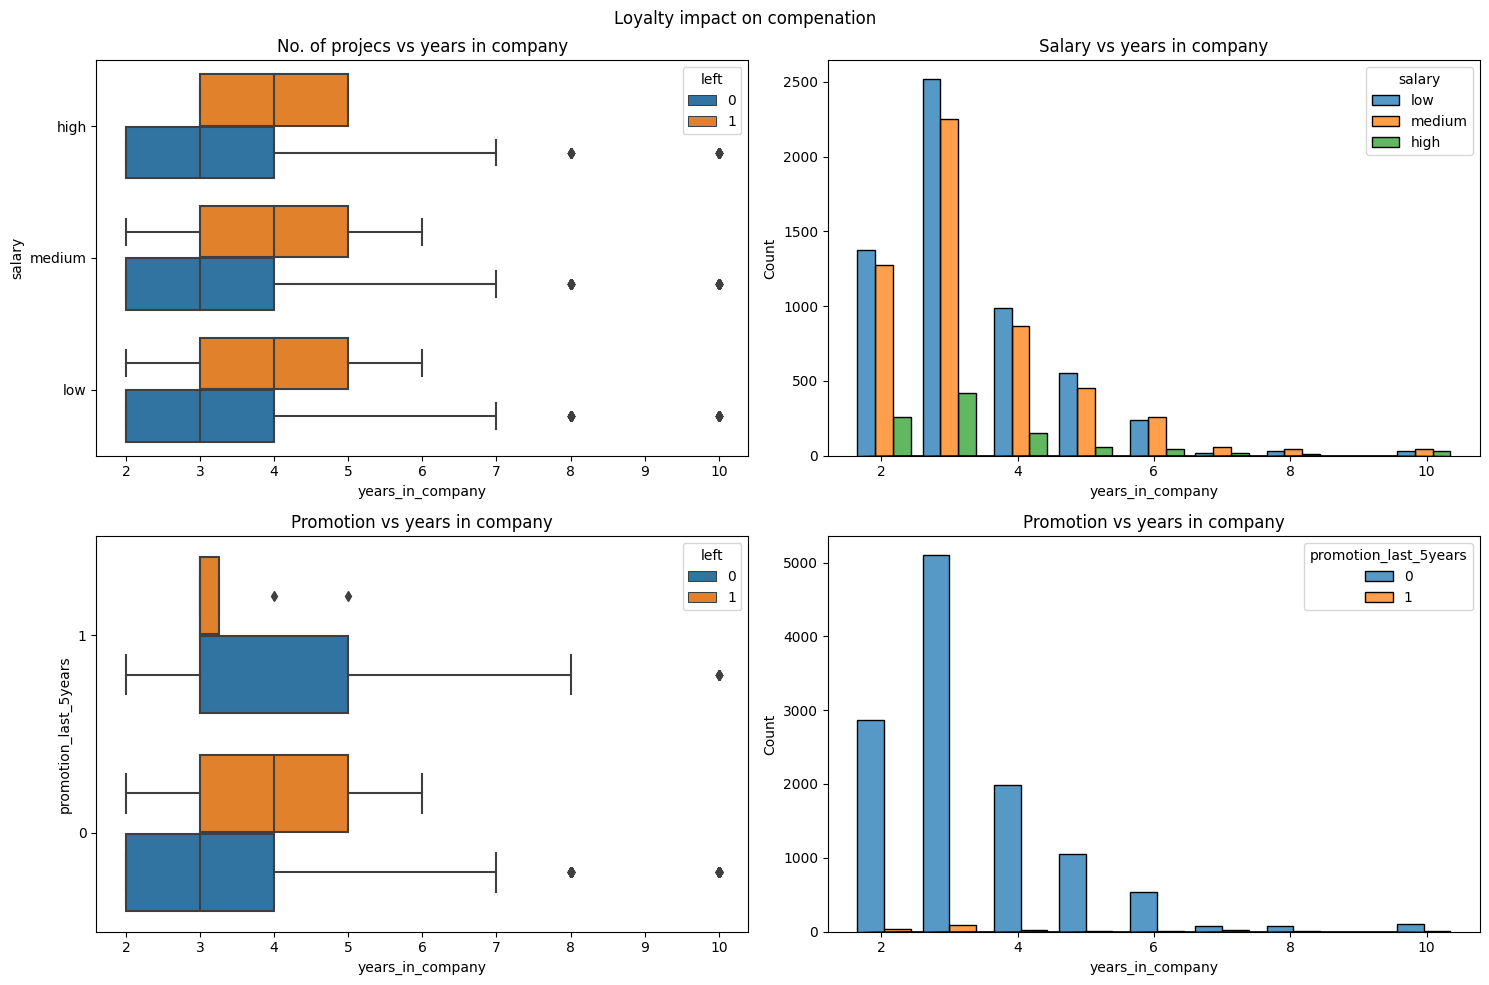

In [23]:
fig, ax = plt.subplots(nrows= 2, ncols = 2 , figsize = (15,10))
ax0  = sns.boxplot(ax = ax[0,0], data = df, x = 'years_in_company', y = 'salary', hue = 'left' , orient = 'h')
ax0.set_title('No. of projecs vs years in company')
ax0.invert_yaxis()
ax1  = sns.histplot(ax = ax[0,1], data = df, x = 'years_in_company',  hue = 'salary', multiple = 'dodge', shrink = 9 )
ax1.set_title('Salary vs years in company')

ax2  = sns.boxplot(ax = ax[1,0], data = df, x = 'years_in_company', y = 'promotion_last_5years', hue = 'left' , orient = 'h')
ax2.set_title('Promotion vs years in company')
ax2.invert_yaxis()
ax3  = sns.histplot(ax = ax[1,1], data = df, x = 'years_in_company',  hue = 'promotion_last_5years', multiple = 'dodge', shrink = 9 )
ax3.set_title('Promotion vs years in company')

plt.suptitle('Loyalty impact on compenation')
plt.tight_layout()
plt.show()

The length of tenure in the company doesnt seems to have any impact on the salary level people are on. The proportion of people who are on high salary doesn't go significantly higher with the years spent in the company

Also, while there is a certain tendency for people getting promotion after a certain amount of years, the proportion of people who got promoted doesn't increase with time. The general proportion of people who received a promotion is marginally small.

To conclude, the length of tenure is also not a good indicator of the chance for promotion, nor it indicates a higher chance for finding oneself in a higher salary level.

# EDA Summary

About 16% people in the dataset left are reported to have left the company. From the analysis we can diagnose some problems of the company that are reflected in the high turnover. 

There are 3 dominant risk groups of people who have left the company - very dissatisfied with good evaluation, dissaisfied with mediocre evaluation, and satisfied with high evaluation. Lookinga at other factors people who work longer on average in comparison with their peers at the same career stage (department, tenure, number of projects), have on average more projects, and hasn't been promoted within 3-5 years from them joining the company.

The company has some general problem that are very clearly reflected in data.

- Employee overworking problem with median average monthly hours being around 200hrs and reaching even 320hrs!
- hard work (long hours and many projects) is not reflected in proportional compensation nor in an increased chance for a promotion


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


We will now prepare a machine learning model in order to fulfill the goal set by the client - to predict which employee will leave/ is at risk of leaving.


The data has a few outliers and 3 types of data(numerical, nominal and ordinal categories). A convienient model that will deal with this variety well and is "immune" to outliers would be the decision tree model. In this project we will compare the decision tree, the random forest and the XGBoost models and determine the best one.

To prepare the dataset for the modeling we need to adjust the features. Got some dummies etc. Gonna do it now

In [24]:
df.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_in_company  work_accidents left  \
0                    157                 3               0    1   
1                    262                 6               0    1   
2                    272                 4               0    1   
3                    223                 5               0    1   
4                    159                 3               0    1   

  promotion_last_5years department  salary  
0                     0      sales     low  
1                     0      sales  medium  
2                     0      sales  medium  
3                     0      sales     low  
4                     0      sales     low

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     11991 non-null  float64 
 1   last_evaluation        11991 non-null  float64 
 2   number_of_projects     11991 non-null  int64   
 3   average_monthly_hours  11991 non-null  int64   
 4   years_in_company       11991 non-null  int64   
 5   work_accidents         11991 non-null  int64   
 6   left                   11991 non-null  category
 7   promotion_last_5years  11991 non-null  category
 8   department             11991 non-null  object  
 9   salary                 11991 non-null  object  
dtypes: category(2), float64(2), int64(4), object(2)
memory usage: 1.1+ MB


EDA process allowed us to determine that certain features show correlation wit hthe target variable. We also checked that some others do not have a direct impact on the target variable 

Following our EDA proceedings, we will remove features identified as irrelevant for the task. Those features are:
- `department` , `work_accidents` 

Then, we will make categorical variables interpretable by the model. The feature to be converted is:
- `salary`

The features that are left as categories need to come back to their original style, for the sake of the xgboost model. Those features are:
- `left`, `promotion_last_5years`

Another categorical in its essence variables, `promotion-last_5years`, is already in a form that is understandable by the model.

Finally we will also remove the target variable - `left` and use it as a label for our supervised learning model.

In [26]:
df['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [27]:
#converting salary feature to int while keeping the order
mapper = {'low':0, 'medium':1, 'high':2}
df['salary'] = df['salary'].replace(mapper)
df['salary'].value_counts()

df['left'] = df['left'].astype('int64')
df['promotion_last_5years'] = df['promotion_last_5years'].astype('int64')

In [28]:
# 'left' feature removed and becomes the label, X_df is the dataset formatted to be used for machine learning
y= df['left']
X_df = df.drop( columns = ['left','department','work_accidents'])

In [29]:
X_df.head()

satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_in_company  promotion_last_5years  salary  
0                    157                 3                      0       0  
1                    262                 6                      0       1  
2                    272                 4                      0       1  
3                    223                 5                      0       0  
4                    159                 3                      0       0

We have obtained a clean dataset ready to be used. In order to further control its feasibility, we will make a correlation heatmap, to see correlations between all of the different features. A good feature collection should include features that aren't too much correlated with each other.

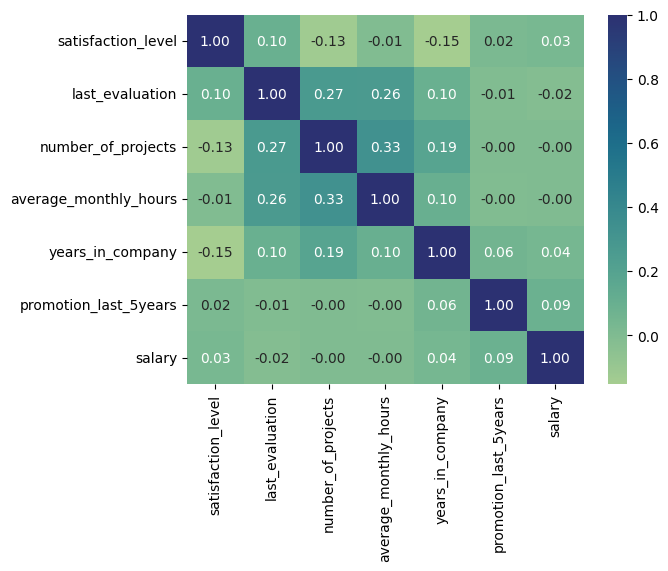

In [30]:
corrs = X_df.corr()

cm = sns.heatmap(corrs , annot = True , fmt = '.2f', cmap = 'crest')

plt.show()

The correlations betwen different features is below 0.35, which is good result and we can accept all the features as they are in the dataset right now.

In [31]:
X = X_df.copy()

## Step 3. Model Building, Step 4. Results and Evaluation

1. The goal of the model will be to predict whether somebody will leave the company or not. It this therefore a binary classification problem with labeled data. 

2. The model used for this task will be a tree-based model for a supervised machine learning. They are a good choice for datasets with categorical data and natural outliers that we don't want to remove

In [32]:
#downloading necessary packages

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [33]:
#initializing instances of each model in use
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
xgb = XGBClassifier(objective='binary:logistic',random_state = 42)

In [34]:
#dividing a dataset on train|val|test sets in the proportion : 0.6|0.2|0.2
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , stratify = y, random_state = 42)
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.25 , stratify = y_train, random_state = 42)

X_train.shape, X_test.shape

((9592, 7), (2399, 7))

In [35]:
dt_params = {'max_depth':[4,5,6,7,8,9,10],
             'min_samples_leaf': [2, 5, 10],
             'min_samples_split': [2, 4, 6]
             }
dt_cv = GridSearchCV(dt , param_grid = dt_params, cv = 5, scoring = 'f1', n_jobs = -1, refit='roc_auc')

In [36]:
rf_params = {'max_depth': [1,3,5,9,13], 
             'min_samples_leaf': [1,3,5,10],
             'min_samples_split': [2,4,6],
             'max_features': [2,4, 6],
             'n_estimators': [75, 100, 150, 300, 500]
             }
rf_cv = GridSearchCV(rf , param_grid = rf_params, cv = 5, scoring = 'f1', n_jobs = -1, refit='roc_auc')

In [37]:
xgb_params = {'max_depth': [1,3,5,9,13], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 150, 200],
             'subsample': [0.5, 0.75, 0.8]
             }    
xgb_cv = GridSearchCV(xgb , param_grid = xgb_params, cv = 5, scoring = 'f1', n_jobs = -1, refit='roc_auc')
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [38]:
%%time
dt_cv.fit(X_train,y_train)

CPU times: user 416 ms, sys: 177 ms, total: 594 ms
Wall time: 1.37 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc', scoring='f1')

In [39]:
%%time
rf_cv.fit(X_train,y_train)

CPU times: user 10.3 s, sys: 942 ms, total: 11.2 s
Wall time: 5min 39s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 9, 13],
                         'max_features': [2, 4, 6],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [75, 100, 150, 300, 500]},
             refit='roc_auc', scoring='f1')

In [40]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: user 4min 44s, sys: 843 ms, total: 4min 45s
Wall time: 3min 1s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [1, 3, 5, 9, 13],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 150, 200],
                         'subsample': [0.5, 0.75, 0.8]},
             refit='roc_auc', scoring='f1')

In [41]:
y_test_pred_dt = dt_cv.best_estimator_.predict(X_test)
y_test_pred_rf = rf_cv.best_estimator_.predict(X_test)
y_test_pred_xgb = xgb_cv.best_estimator_.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



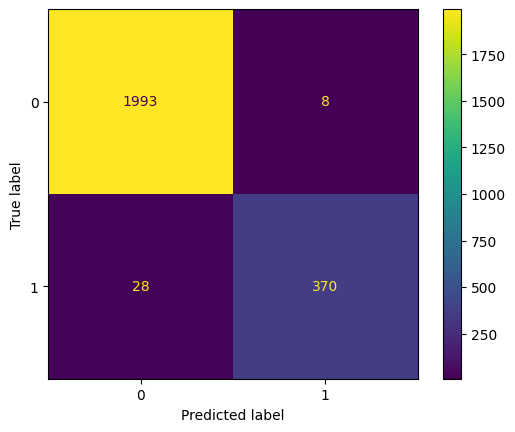

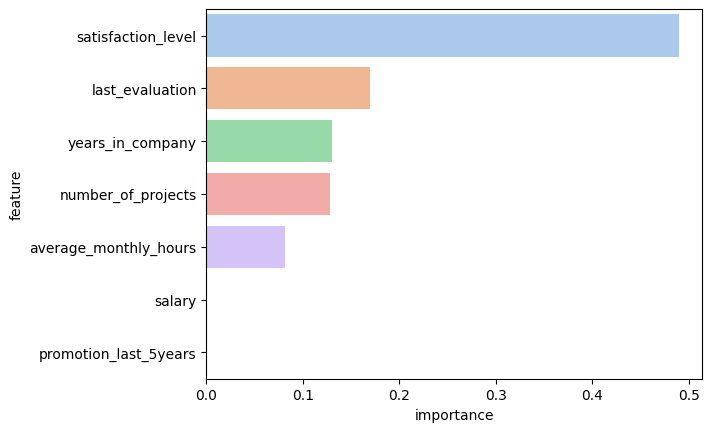

In [42]:
print(classification_report(y_test,y_test_pred_dt))

cm = confusion_matrix(y_test,y_test_pred_dt, labels=dt_cv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_cv.best_estimator_.classes_)
#plt.suptitle('Confusion matrix for DT')  
disp.plot(values_format='')
plt.show()


feature_plotting = zip(X.columns,dt_cv.best_estimator_.feature_importances_ )
importances = pd.DataFrame(feature_plotting, columns=['feature','importance'])
importances = importances.sort_values(by = 'importance', ascending = False)
sns.barplot(data= importances , y = 'feature' , x = 'importance' , palette = 'pastel')

plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399



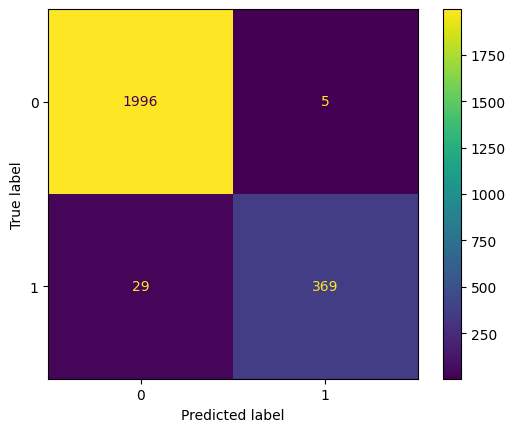

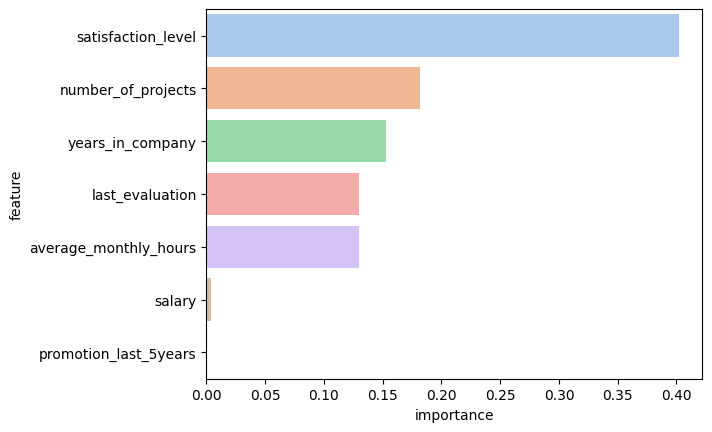

In [43]:
print(classification_report(y_test,y_test_pred_rf))

cm = confusion_matrix(y_test,y_test_pred_rf, labels=rf_cv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_cv.best_estimator_.classes_)
  
disp.plot(values_format='')
plt.show()


feature_plotting = zip(X.columns,rf_cv.best_estimator_.feature_importances_ )
importances = pd.DataFrame(feature_plotting, columns=['feature','importance'])
#importances.plot(kind='bar')
importances = importances.sort_values(by = 'importance', ascending = False)
# importances['index'] = importances.index
# importances['features'] = importances['0']
# importances
sns.barplot(data= importances , y = 'feature' , x = 'importance' , palette = 'pastel')
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.93      0.95       398

    accuracy                           0.99      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399



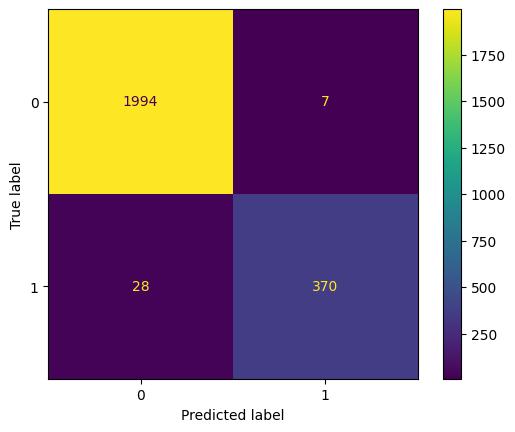

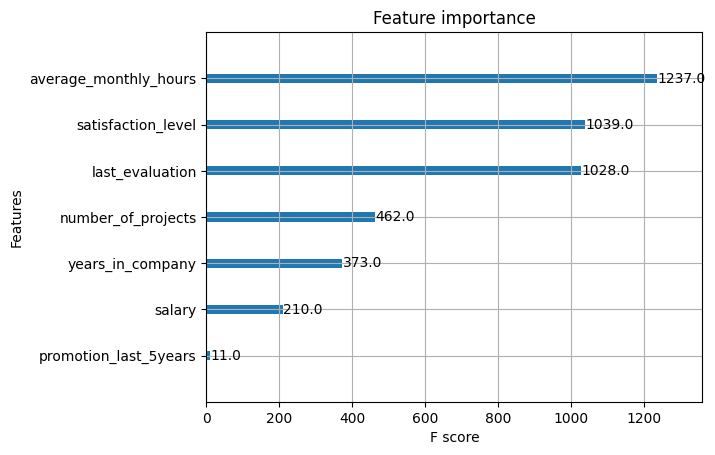

In [44]:
print(classification_report(y_test,y_test_pred_xgb))

cm = confusion_matrix(y_test,y_test_pred_xgb, labels=xgb_cv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cv.best_estimator_.classes_)
  
disp.plot(values_format='')
plt.show()


plot_importance(xgb_cv.best_estimator_)
plt.show()

In [45]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [46]:
model_list = [('DT val' , dt_cv), ('RF val', rf_cv), ('XGB val' , xgb_cv)]
scores = pd.DataFrame()
for model in model_list:
    scores = scores.append(get_scores(model[0],model[1], X_test, y_test) )

scores              

model  precision    recall        f1  accuracy       AUC
0   DT val   0.978836  0.929648  0.953608  0.984994  0.962825
0   RF val   0.986631  0.927136  0.955959  0.985827  0.962318
0  XGB val   0.981432  0.929648  0.954839  0.985411  0.963075

All models show very good results and seems to be very good in detecting who leaves and who stays. 

The criterion we chose for this ROC_AUC score, as it is a class-imbalance friendly score. In this score the Random Forest model turned out to be the best choice.

While the models have performed on a very similar level, there is one more test that the models could undergo.

So far we have been assuming that there is no possible data leakage in the dataset. When looked closer we can find that values of certain features could've been caused by being fired/quitting, and not the other way around. 

The `satisfaction level` of someone who's about to be fired can be naturally lower than somebody without this perspective. Also, `average monthly hours` can be influenced by quitting, as people leaving/to be fired may be assigned less work. Finally, the performance showed in `last_evaluation` of somebody who is about to quit/has been fired will drop. 

To account for those cases we will adjust our dataset.

`satisfaction_level`
We will drop this feature completely.

`last evaluation`
We will divide it into 4 levels, equal to 4 quartiles

`average_monthly_hours` 
We will create a new feature to account for wroking over time

In [47]:
X_new = X.drop('satisfaction_level',axis = 1)
# we choose to mark an overworked employee as somebody who did > 180 hrs per month
X_new['overworked'] = (X['average_monthly_hours'] > 180).astype(int)
X_new['evaluation_level'] = X['last_evaluation']

X_new.loc[ X_new['evaluation_level'] <0.25, 'evaluation_level'] = 0
X_new.loc[ (X_new['evaluation_level'] >=0.25)&(X_new['evaluation_level'] <0.5), 'evaluation_level'] = 1
X_new.loc[ (X_new['evaluation_level'] >=0.5)&(X_new['evaluation_level'] <0.75), 'evaluation_level'] = 2
X_new.loc[ (X_new['evaluation_level'] >=0.75)&(X_new['evaluation_level'] <1), 'evaluation_level'] = 3

X_new['evaluation_level'] = X_new['evaluation_level'].astype('int64')

X_new = X_new.drop(['last_evaluation','average_monthly_hours'],axis = 1)

In [48]:
X_new.head()

number_of_projects  years_in_company  promotion_last_5years  salary  \
0                   2                 3                      0       0   
1                   5                 6                      0       1   
2                   7                 4                      0       1   
3                   5                 5                      0       0   
4                   2                 3                      0       0   

   overworked  evaluation_level  
0           0                 2  
1           1                 3  
2           1                 3  
3           1                 3  
4           0                 2

Having the datast prepared like this, we perform the fitting again

In [49]:
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
xgb = XGBClassifier(objective='binary:logistic',random_state = 42)


#dividing a dataset on train|val|test sets in the proportion : 0.6|0.2|0.2
X_train , X_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2 , stratify = y, random_state = 42)

dt_params = {'max_depth':[4,5,6,7,8,9,10],
             'min_samples_leaf': [2, 5, 10],
             'min_samples_split': [2, 4, 6]
             }
dt_cv = GridSearchCV(dt , param_grid = dt_params, cv = 5, scoring = 'f1', n_jobs = -1, refit='roc_auc')

rf_params = {'max_depth': [1,3,5,9,13], 
             'min_samples_leaf': [1,3,5,10],
             'min_samples_split': [2,4,6],
             'max_features': [2,4, 6],
             'n_estimators': [75, 100, 150, 300, 500]
             }
rf_cv = GridSearchCV(rf , param_grid = rf_params, cv = 5, scoring = 'f1', n_jobs = -1, refit='roc_auc')

xgb_params = {'max_depth': [1,3,5,9,13], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 150, 200],
             'subsample': [0.5, 0.75, 0.8]
             }    
xgb_cv = GridSearchCV(xgb , param_grid = xgb_params, cv = 5, scoring = 'f1', n_jobs = -1, refit='roc_auc')
#scoring = {'accuracy', 'precision', 'recall', 'f1'}
dt_cv.fit(X_train,y_train)
rf_cv.fit(X_train,y_train)
xgb_cv.fit(X_train,y_train)

y_test_pred_dt = dt_cv.best_estimator_.predict(X_test)
y_test_pred_rf = rf_cv.best_estimator_.predict(X_test)
y_test_pred_xgb = xgb_cv.best_estimator_.predict(X_test)

model_list = [('DT val' , dt_cv), ('RF val', rf_cv), ('XGB val' , xgb_cv)]
scores = pd.DataFrame()
for model in model_list:
    scores = scores.append(get_scores(model[0],model[1], X_test, y_test) )

scores 

model  precision    recall        f1  accuracy       AUC
0   DT val   0.837647  0.894472  0.865128  0.953731  0.929995
0   RF val   0.845070  0.904523  0.873786  0.956649  0.935770
0  XGB val   0.845070  0.904523  0.873786  0.956649  0.935770

After making sure the is no data leakage, the performance of the models decreased. They still achieve very good score however. Surprisingly, the Random Forest and XGB have scored the exactly same score in all the metrics!

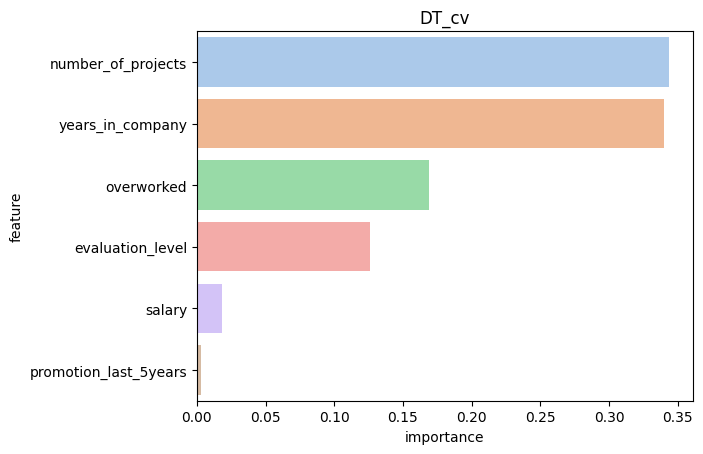

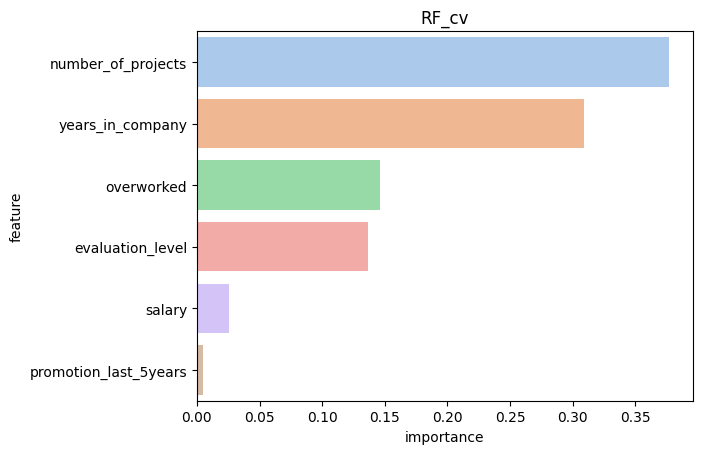

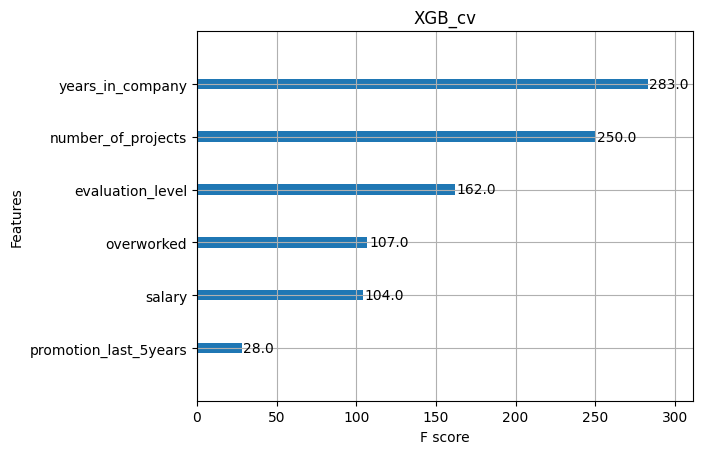

In [50]:
feature_plotting = zip(X_new.columns,dt_cv.best_estimator_.feature_importances_ )
importances = pd.DataFrame(feature_plotting, columns=['feature','importance'])
importances = importances.sort_values(by = 'importance', ascending = False)
sns.barplot(data= importances , y = 'feature' , x = 'importance' , palette = 'pastel')
plt.title('DT_cv')
plt.show()

feature_plotting = zip(X_new.columns,rf_cv.best_estimator_.feature_importances_ )
importances = pd.DataFrame(feature_plotting, columns=['feature','importance'])
importances = importances.sort_values(by = 'importance', ascending = False)
sns.barplot(data= importances , y = 'feature' , x = 'importance' , palette = 'pastel')
plt.title('RF_cv')
plt.show()

plot_importance(xgb_cv.best_estimator_)
plt.title('XGB_cv')
plt.show()

The barplots show the feature importance ranking. `year_in_company` and `number_of_projects` have the highest importance. Then `overworked` and `evaluation_level`, followed by `salary`, valued more by the XGB model and less by Decision Tree models. Finally, the `promotion_last_5years` is unilaterlaterally considered the least helpful with predicting the outcome variable

# pacE: Execute Stage



## Step 4. Results and Evaluation


### Summary of model results

After conducting feature engineering, the decision tree model achieved AUC of 93.6%, precision of 84.50%, recall of 90.4%, f1-score of 87.3%, and accuracy of 95.6%, on the test set. The random forest modestly outperformed the decision tree model. The XGB model achieved the exact same values of every metric.

### Conclusion, Recommendations, Next Steps

- The optimal amount of  workload per person is between 3-4 projects. More than that leads to decrease in declared satisfaction

- The company has to face the overwoking problem, people working the longest hours and with the biggest number of projects are the ones with the highest tendency of quitting. `Number_of_projects` is the in top 2 best predictors of quitting. Overwotking clearly burns the employees out and causes severe dissatisfaction for the most heavily loaded with duties

- Hard work is not met with a proper compensation, nor reward. People who work long hours and on many projects don't show higher salary. They also don't show a tendency to be promoted. The dataset doesn't show that the have any clear requirements for promotion or salary raise.

- there may be the risk that high working hours are required to obtain a good evaluation score. This needs to be reconsidered if the employees are supposed to stay

*Next steps*

analyze closer the evaluation and satisfaction score. They may be "self-predicting", meaning the employee has low evaluation because he decided to leave and has less work given, or the employee quits hence he reports lower satisfaction.
The self reported satisfaction is a sensitive data to give, hence it may be biased towards values higher than usual
Last evaluation doesn't have a timestamp, and frequency, it would be good to have acces to the history of them, to determine and recognize the pattern that lead to people quit.


Last evaluation and satisfaction_level are features that aren't objective and may be heavily biased by the situation in the company and the situation of individual people. It would be good to maybe try to perform the model learning without either or both.